In [6]:
import sys
sys.path.append('C:/Users/ifwha/OneDrive - CUHK-Shenzhen/桌面/个人/量化交易/backtest')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import logging
import cProfile
from tqdm.notebook import tqdm

import utils
import config
import strat_test
importlib.reload(utils)
importlib.reload(config)
importlib.reload(strat_test)

<module 'strat_test' from 'C:\\Users/ifwha/OneDrive - CUHK-Shenzhen/桌面/个人/量化交易/backtest\\strat_test\\__init__.py'>

In [2]:
# config
cfg = config.config
blacklist = cfg['universe']['black']
quote_dir = cfg['folder']['quote']

factor_dir = 'C:/Users/ifwha/OneDrive - CUHK-Shenzhen/桌面/工作/A04_指数编制/quote/QUOTE_INDUSTRY/assembler'

end_date = '2025-12-31'

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.grid'] = True
%config InlineBackend.figure_format = 'retina'

INFO:__main__:Read FG with 2759 rows
INFO:__main__:Read hc with 2449 rows
INFO:__main__:Read i with 2553 rows
INFO:__main__:Read j with 3159 rows
INFO:__main__:Read jm with 2688 rows
INFO:__main__:Read rb with 3467 rows
INFO:__main__:Read SF with 2353 rows
INFO:__main__:Read SM with 2353 rows
INFO:__main__:Read SA with 1054 rows


<Axes: xlabel='date'>

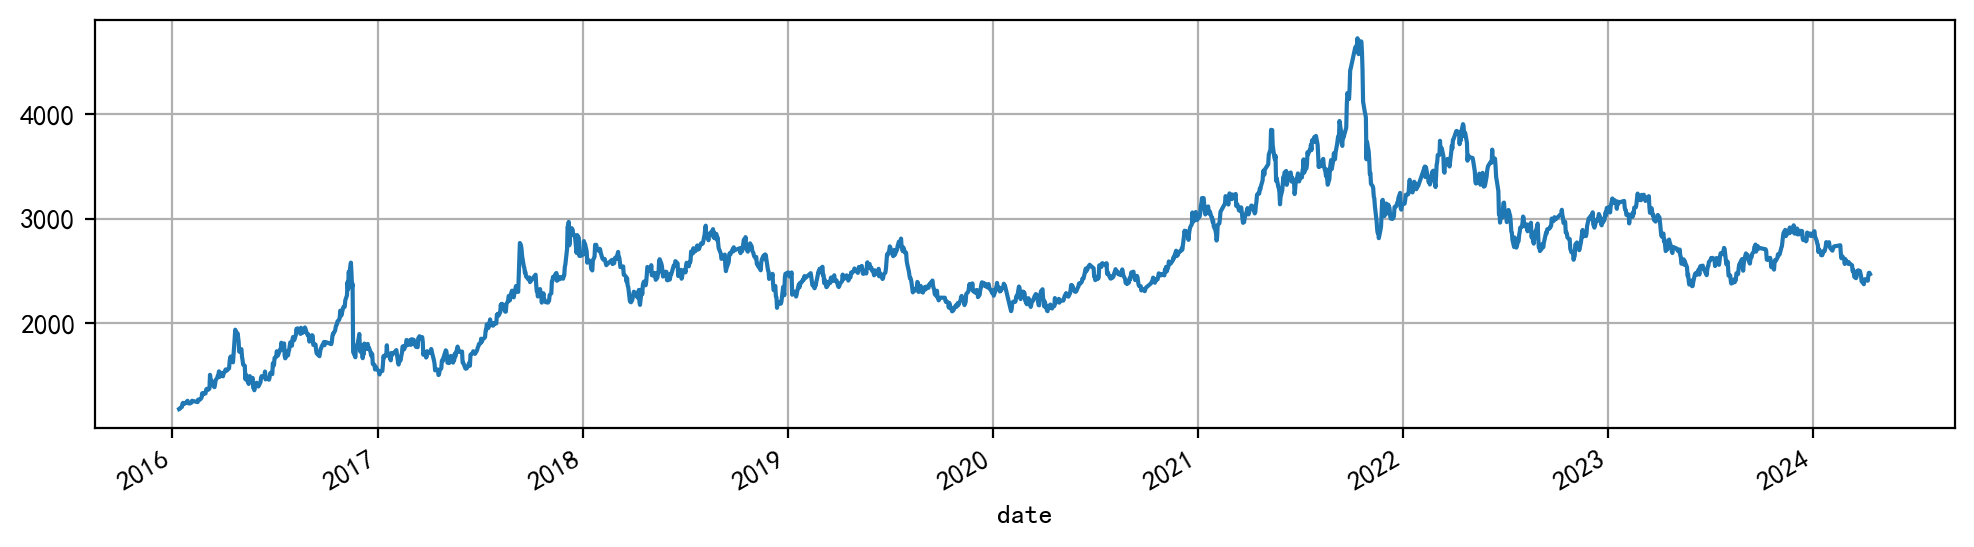

In [3]:
# futures data from quote basic
opens = pd.DataFrame()

data_name = "open777"

for v in blacklist:
    dir_path = os.path.join(quote_dir, "QUOTE_BASIC", "assembler", data_name, f"{v}.csv")
    df = pd.read_csv(dir_path, index_col=0, parse_dates=True)
    df = df.loc[:end_date]
    opens[v] = df[data_name]
    logger.info(f"Read {v} with {len(df)} rows")

# add black index
index_dir = os.path.join(quote_dir, "INDEX/black_open_index_qb.csv")
black_index = pd.read_csv(index_dir, index_col=0, parse_dates=True)
opens["black"] = black_index

opens["black"].plot()

# prices = pd.read_csv("data/price/black_prices.csv", index_col=0, parse_dates=True)
# prices["black"] = prices.mean(axis=1)
# prices.plot()

## I_S002916784
房屋新开工面积:累计同比

Text(0.5, 1.0, 'I_S002916784')

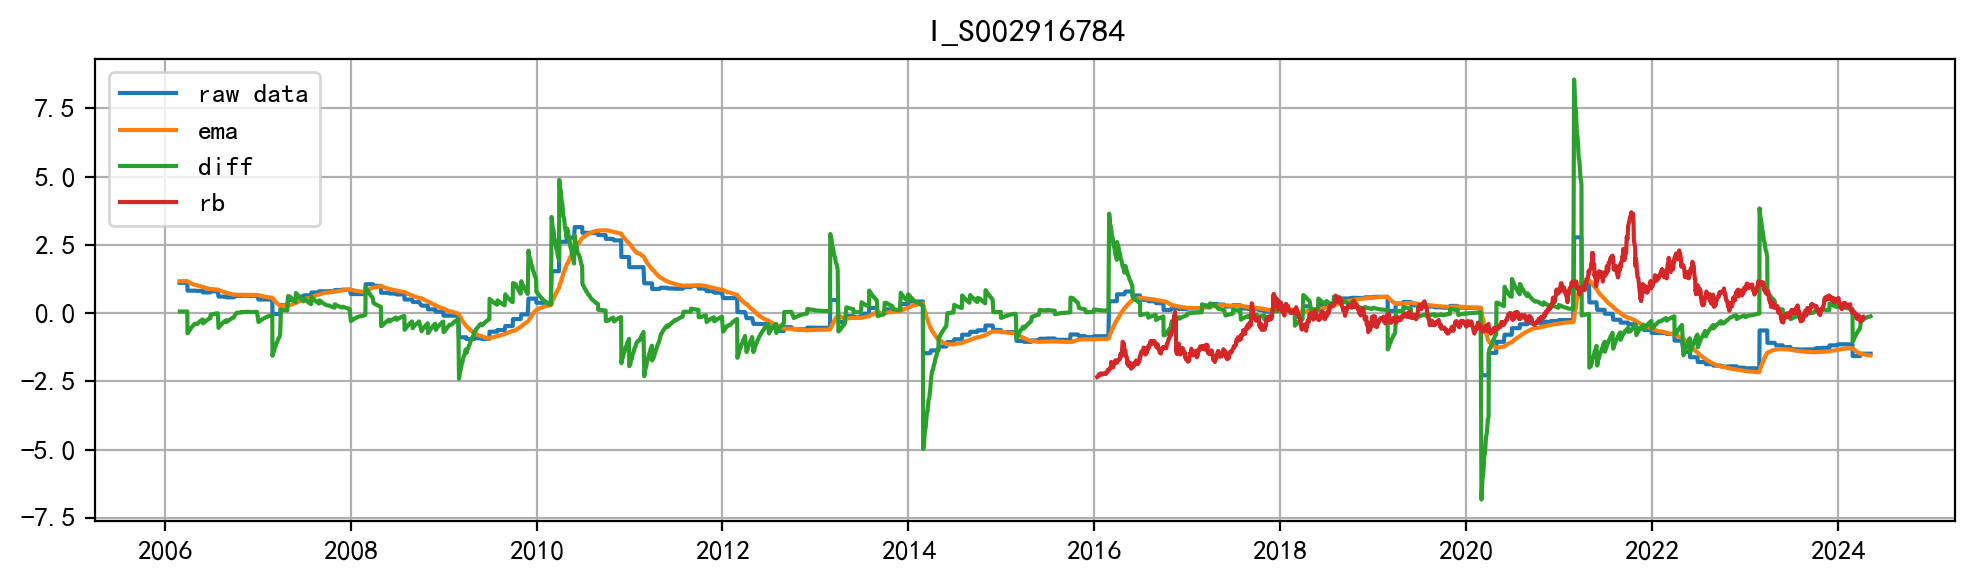

In [400]:
name = "I_S002916784"
I_S002916784 = pd.read_csv(f'{factor_dir}/real_estate.csv',index_col=0, parse_dates=True)[name]
I_S002916784 = I_S002916784.loc[:end_date]
plt.plot(utils.scale(I_S002916784), label='raw data')
I_S002916784 = utils.ema(I_S002916784, 1/35)
plt.plot(utils.scale(I_S002916784), label='ema')
I_S002916784 = I_S002916784.diff()
plt.plot(utils.scale(I_S002916784), label='diff')
# I_S002916784 = utils.ts_rank(I_S002916784, 6, "dynamic") - 0.5
# plt.plot(utils.scale(I_S002916784, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='rb')
plt.legend()
plt.title(name)

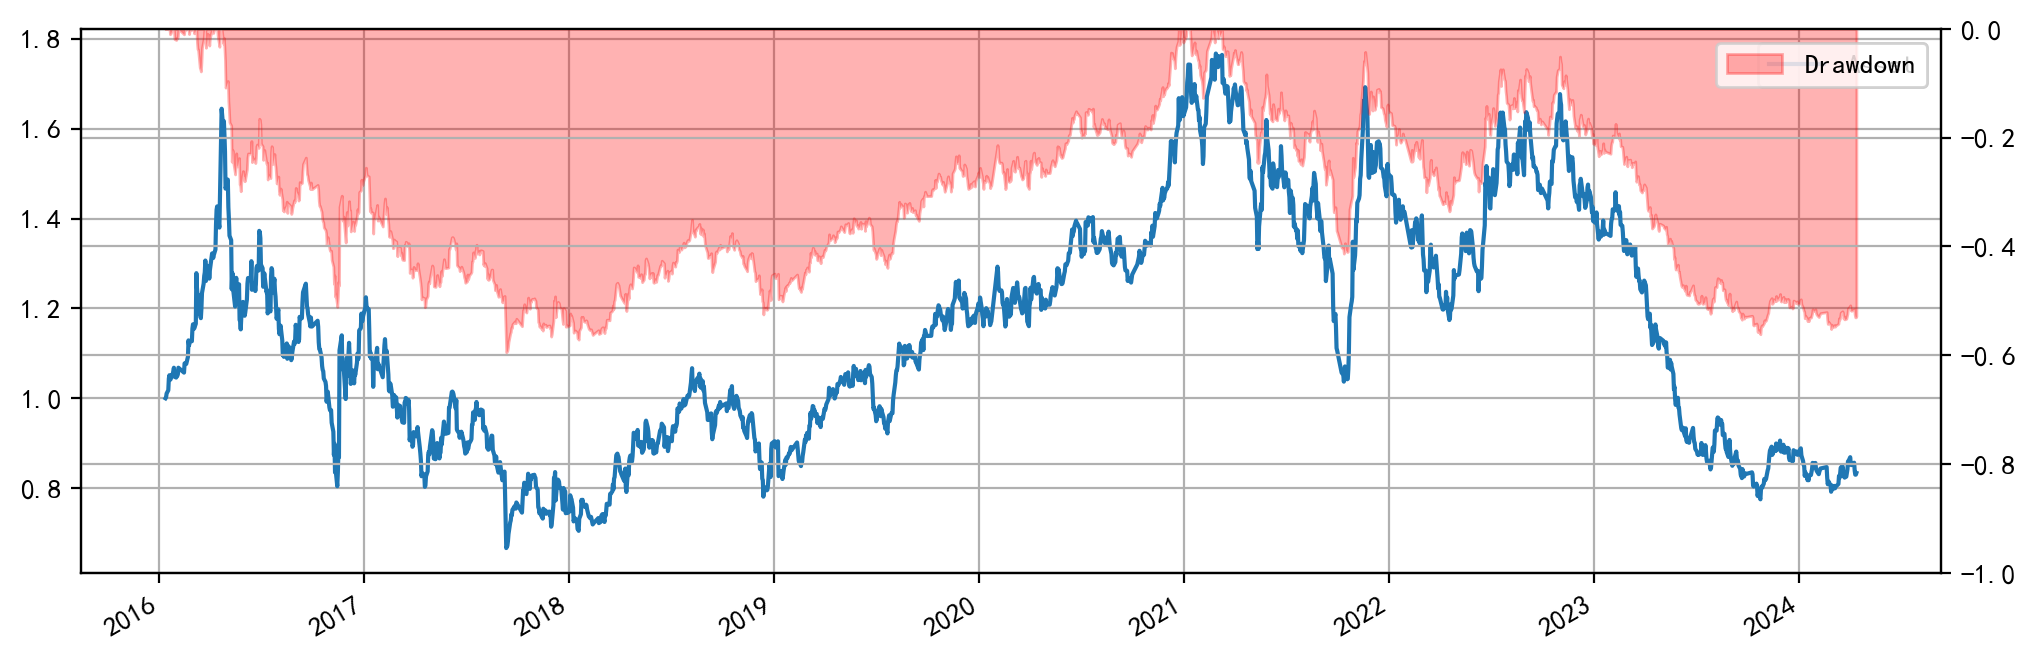

In [401]:
posi = I_S002916784 / I_S002916784.abs()
posi = posi.replace(np.nan, 0)
price, posi = opens['black'].dropna().align(posi, join='inner')
price.name = posi.name = 'black'
nwm = strat_test.NetWorthMaker(price, posi)
nwm.plot()

## I_M005383066
发动机:产量:累计同比

Text(0.5, 1.0, 'I_M005383066')

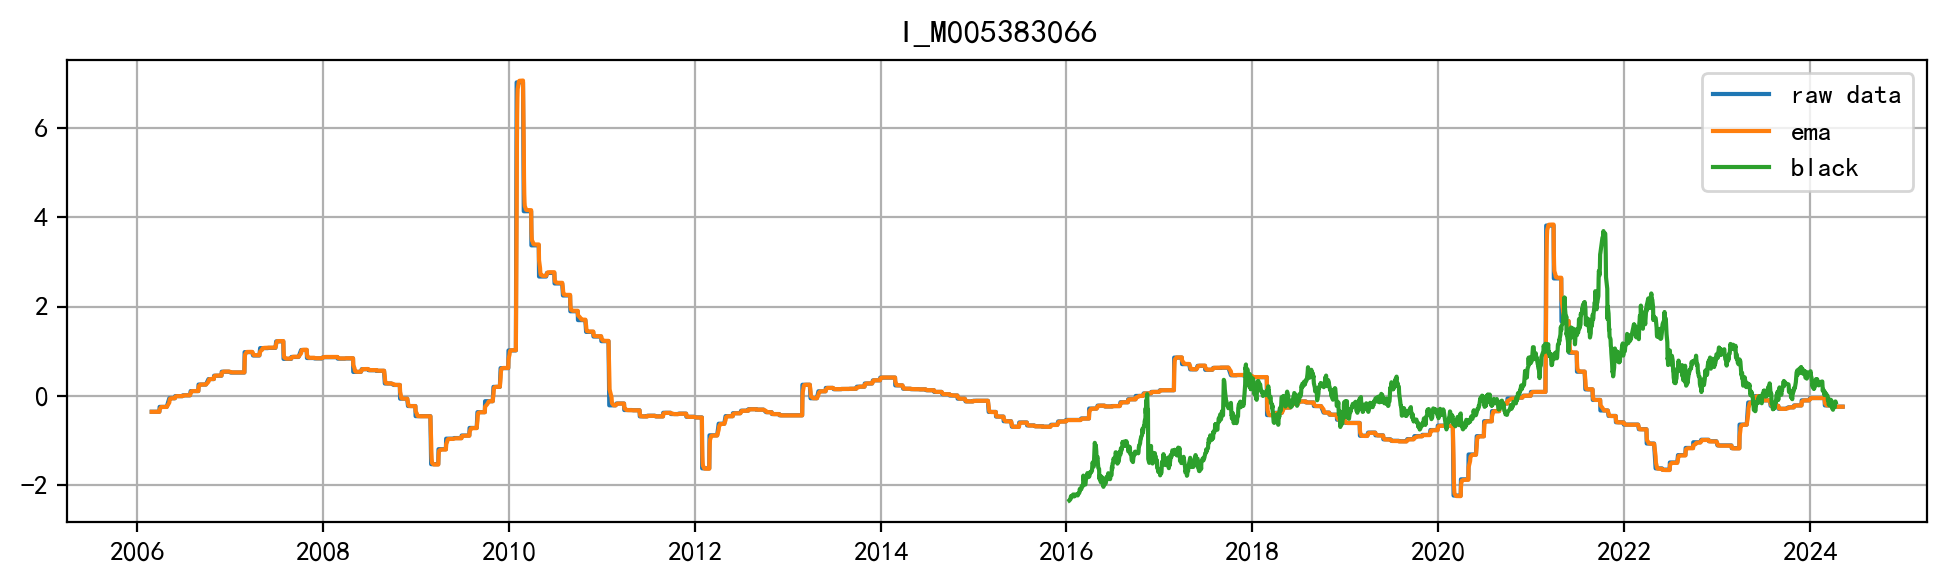

In [402]:
name = "I_M005383066"
I_M005383066 = pd.read_csv(f'{factor_dir}/auto.csv',index_col=0, parse_dates=True)[name]
I_M005383066 = I_M005383066.loc[:end_date]
plt.plot(utils.scale(I_M005383066), label='raw data')
I_M005383066 = utils.ema(I_M005383066, 1/2)
plt.plot(utils.scale(I_M005383066), label='ema')
I_M005383066 = I_M005383066.diff()
# plt.plot(utils.scale(I_M005383066, "divstd"), label='diff')
# I_M005383066 = utils.ts_rank(I_M005383066, 6, "dynamic") - 0.5
# plt.plot(utils.scale(I_M005383066, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

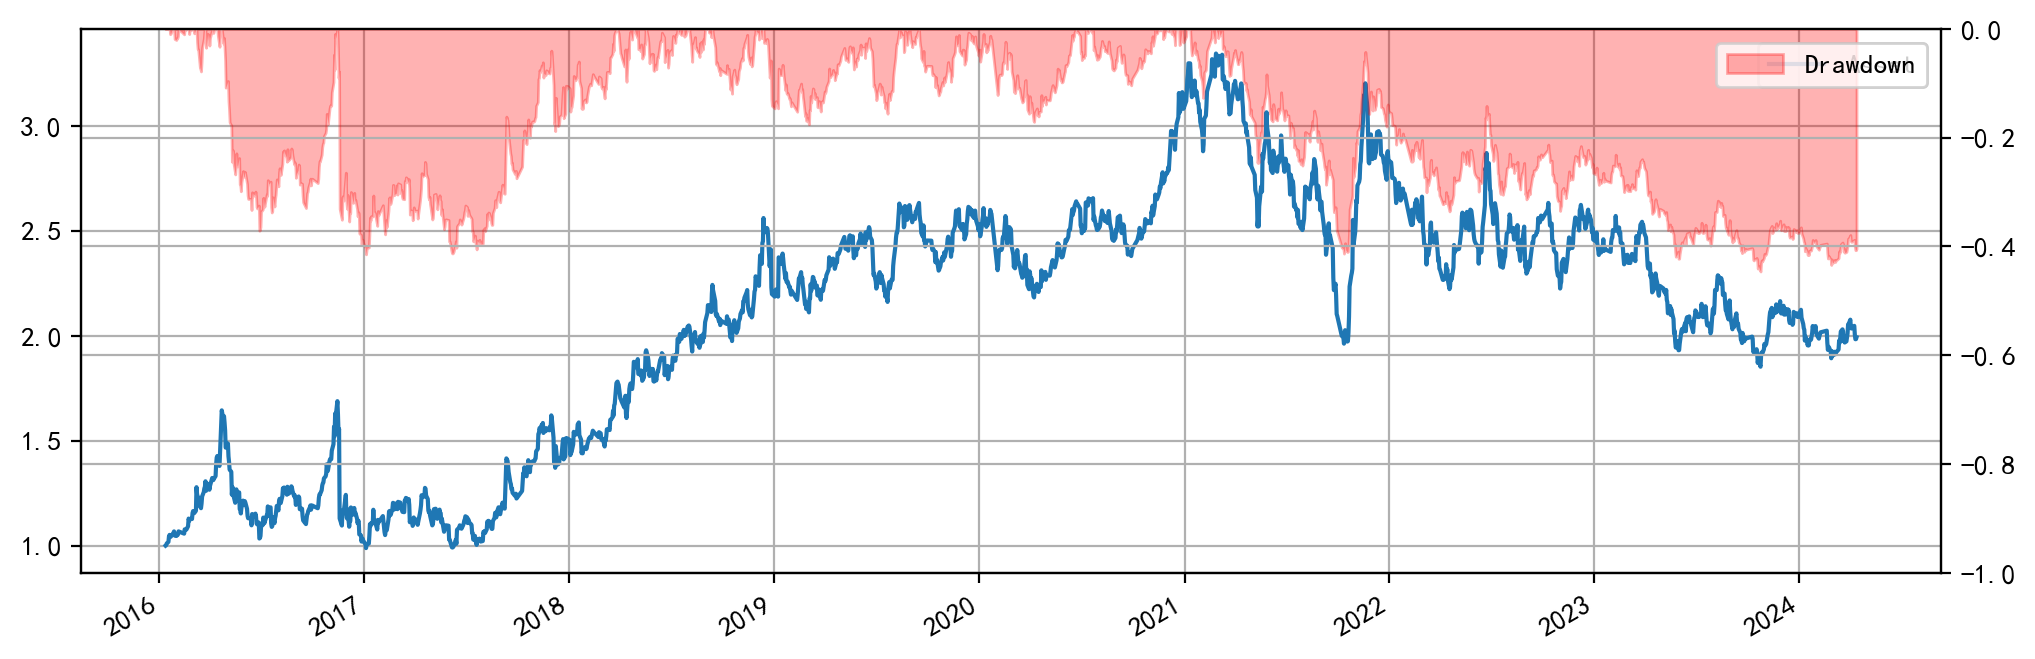

In [403]:
posi_1 = I_M005383066 / I_M005383066.abs()
posi_1 = posi_1.replace(np.nan, 0)
price, posi_1 = opens['black'].dropna().align(posi_1, join='inner')
price.name = posi_1.name = 'black'
nwm = strat_test.NetWorthMaker(price, posi_1)
nwm.plot()

## I_S009065219
商用车:出口数量:当月同比

Text(0.5, 1.0, 'I_S009065219')

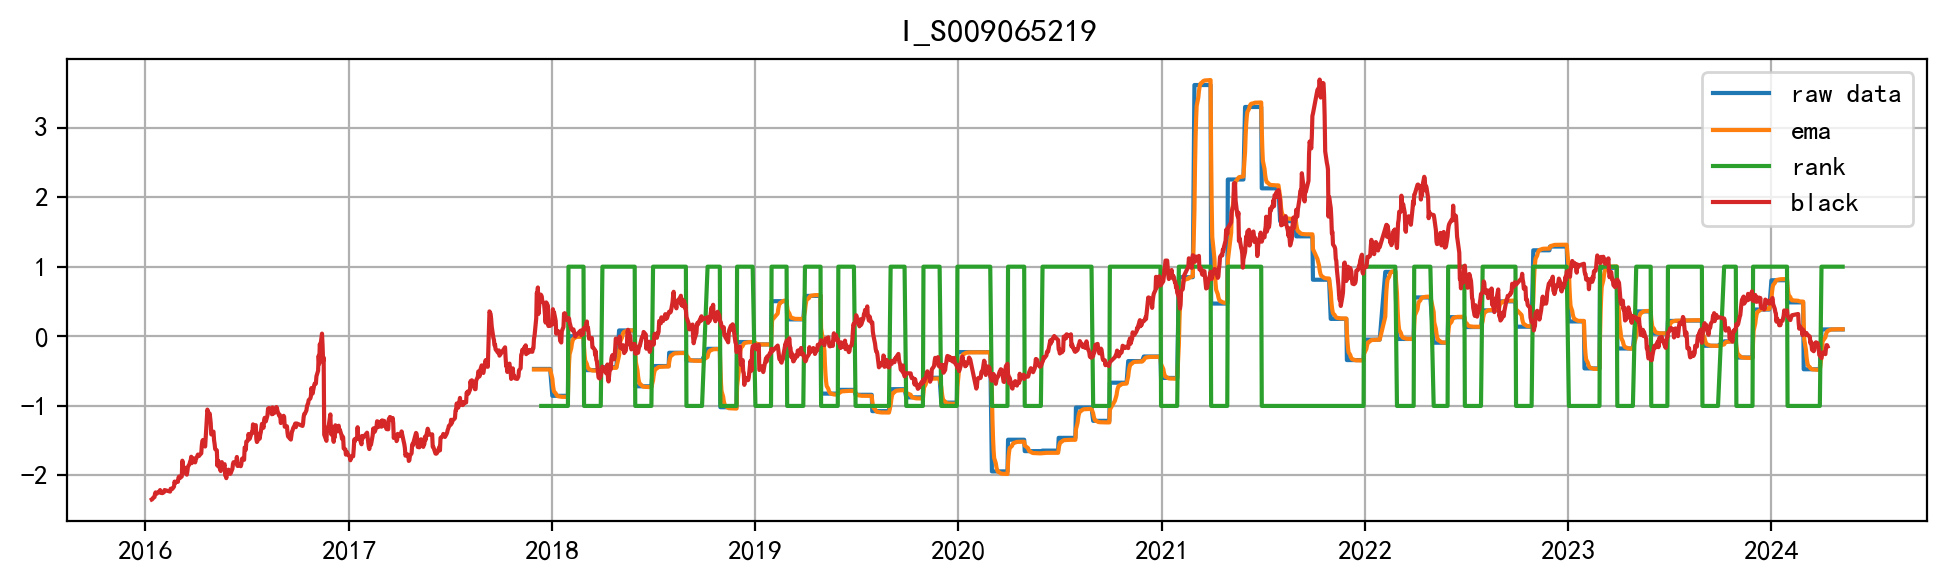

In [4]:
name = "I_S009065219"
I_S009065219 = pd.read_csv(f'{factor_dir}/auto.csv',index_col=0, parse_dates=True)[name]
I_S009065219 = I_S009065219.loc[:end_date]
plt.plot(utils.scale(I_S009065219), label='raw data')
I_S009065219 = utils.ema(I_S009065219, 1/3)
plt.plot(utils.scale(I_S009065219), label='ema')
# I_S009065219 = I_S009065219.diff()
# plt.plot(utils.scale(I_S009065219, "divstd"), label='diff')
I_S009065219 = utils.ts_rank(I_S009065219, 9, "dynamic") - 0.5
plt.plot(utils.scale(I_S009065219, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

In [7]:
def test_params(name, end_date, ema_alpha, ts_rank_w):
    factor = pd.read_csv(f'{factor_dir}/auto.csv',index_col=0, parse_dates=True)[name]
    factor = factor.loc[:pd.to_datetime(end_date)]
    factor = utils.ema(factor, ema_alpha)
    factor = utils.ts_rank(factor, ts_rank_w, "numpy") - 0.5
    posi = factor / factor.abs()
    posi = posi.replace(np.nan, 0)
    price, posi = opens['black'].align(posi, join='inner')
    price.name = posi.name = 'black'
    nwm = strat_test.NetWorth(price, posi)
    return nwm, posi

In [ ]:
alphas = range(2, 25)
ws = range(2, 20)
rets = pd.DataFrame(index=alphas, columns=ws)

for alpha in tqdm(alphas):
    for w in ws:
        nwm, _ = test_params(name, end_date, ema_alpha=1/alpha, ts_rank_w=w)
        rets.loc[alpha, w] = nwm.get_total().loc['calmar']

In [176]:
rets.apply(pd.to_numeric).style.background_gradient(axis=None).format("{:.2f}")

<Axes: >

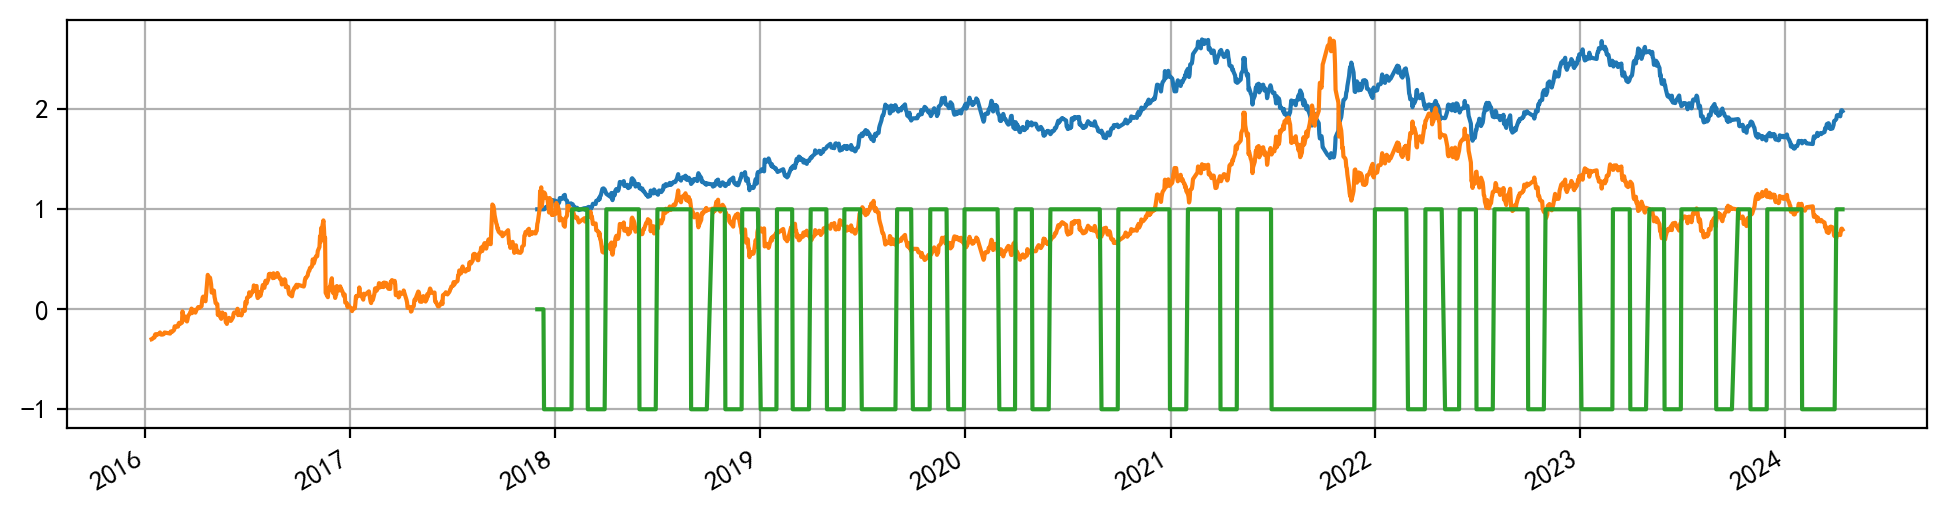

In [8]:
nwm, posi_2 = test_params(name, end_date, ema_alpha=1/3, ts_rank_w=9)
plt.plot(nwm.get_networth(), label='networth')
plt.plot(utils.scale(opens['black'], "1stvalue")-1.3)
posi_2.plot()

## I_S009128891
制热:空气源热泵:销量:累计同比

Text(0.5, 1.0, 'I_S009128891')

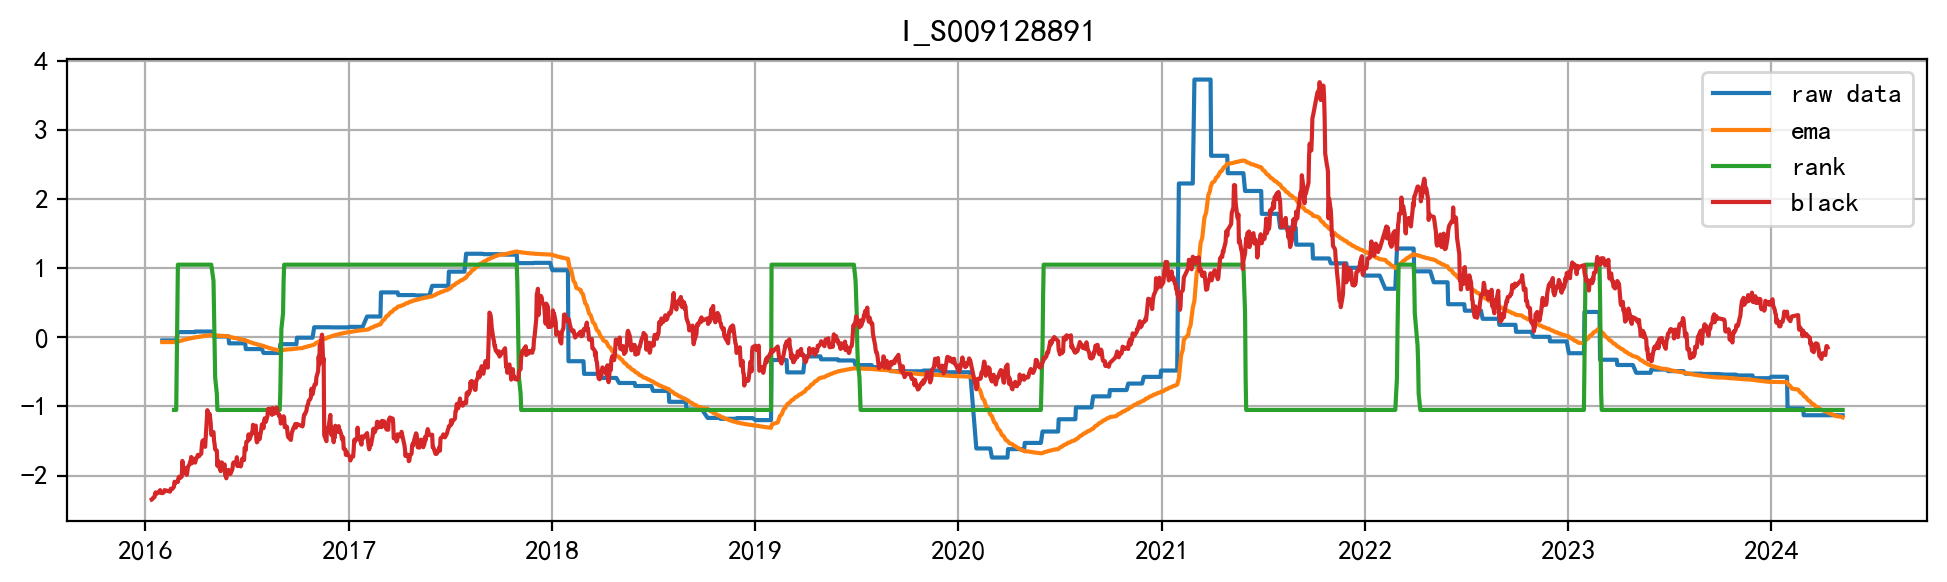

In [408]:
name = "I_S009128891"
I_S009128891 = pd.read_csv(f'{factor_dir}/mech_equip.csv',index_col=0, parse_dates=True)[name]
I_S009128891 = I_S009128891.loc[:end_date]
plt.plot(utils.scale(I_S009128891), label='raw data')
I_S009128891 = utils.ema(I_S009128891, 1/35)
plt.plot(utils.scale(I_S009128891), label='ema')
# I_S009128891 = I_S009128891.diff()
# plt.plot(utils.scale(I_S009128891, "divstd"), label='diff')
I_S009128891 = utils.ts_rank(I_S009128891, 10, "dynamic") - 0.5
plt.plot(utils.scale(I_S009128891, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

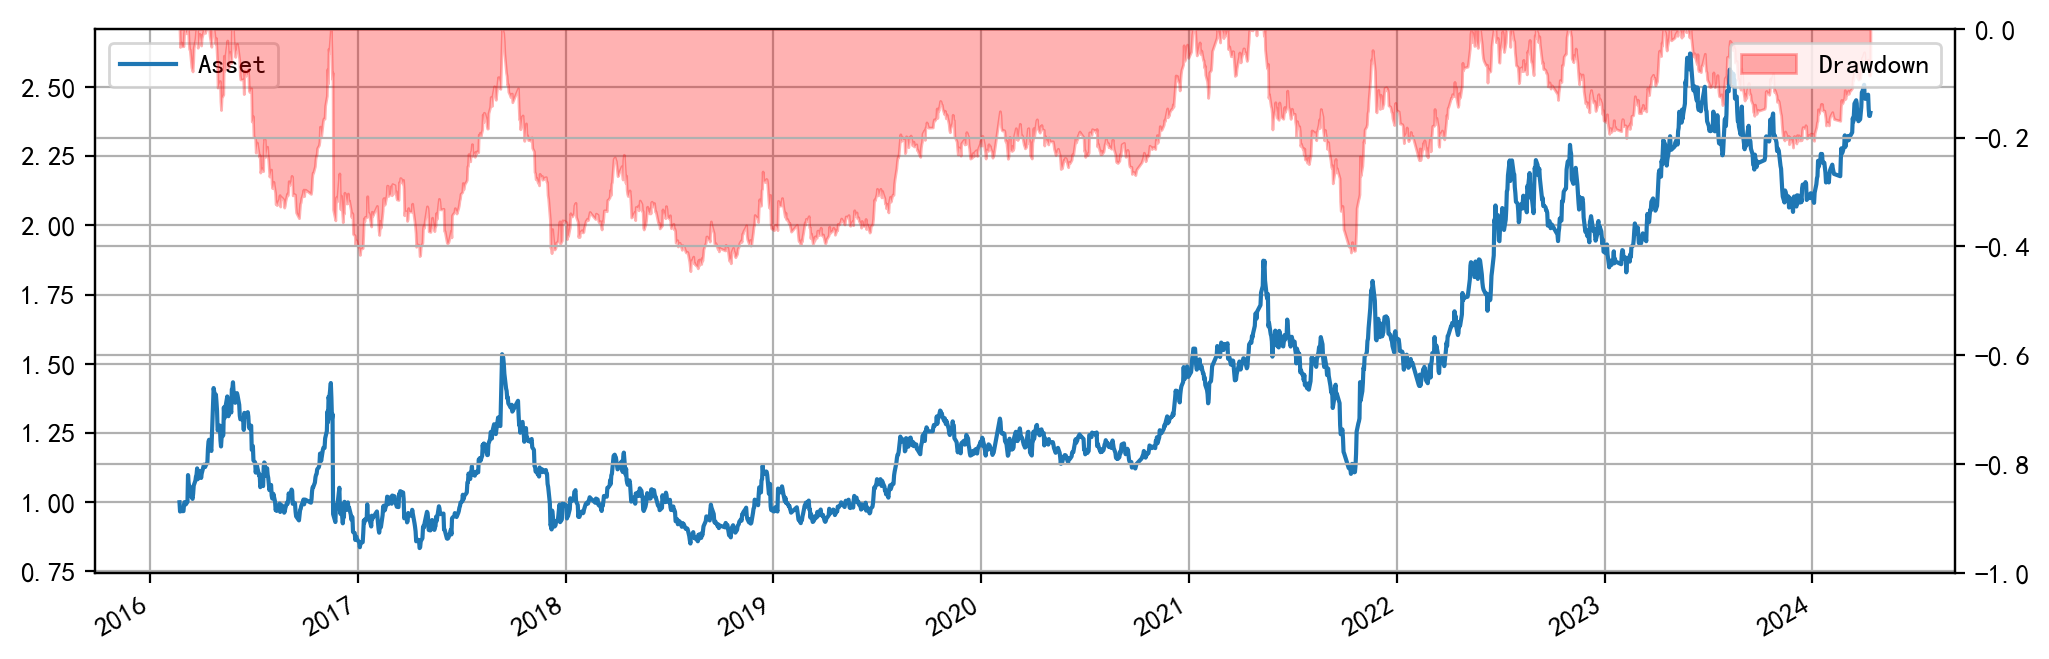

In [198]:
posi_1 = I_S009128891 / I_S009128891.abs()
posi_1 = posi_1.replace(np.nan, 0)
price, posi_1 = opens['black'].dropna().align(posi_1, join='inner')
price.name = posi_1.name = 'black'
nwm = strat_test.NetWorthMaker(price, posi_1)
nwm.plot()

## I_S006273513
100大中城市:成交土地规划建筑面积:当周值
似乎用不了？

Text(0.5, 1.0, 'I_S006273513')

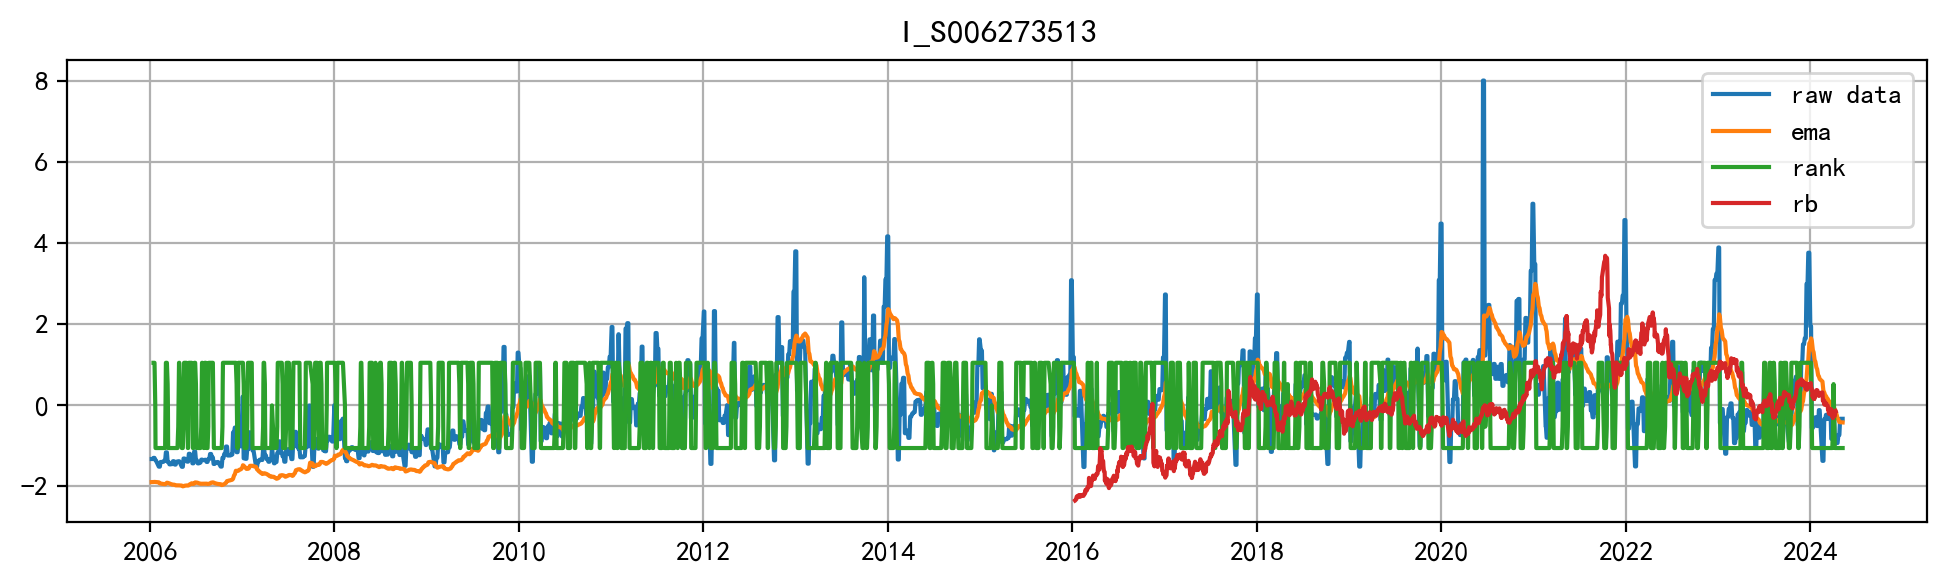

In [409]:
name = "I_S006273513"
I_S006273513 = pd.read_csv(f'{factor_dir}/real_estate.csv',index_col=0, parse_dates=True)[name]
I_S006273513 = I_S006273513.loc[:end_date]
plt.plot(utils.scale(I_S006273513), label='raw data')
I_S006273513 = utils.ema(I_S006273513, 1/40)
plt.plot(utils.scale(I_S006273513), label='ema')
# I_S006273513 = I_S006273513.diff()
# plt.plot(utils.scale(I_S006273513), label='diff')
I_S006273513 = utils.ts_rank(I_S006273513, 5, "dynamic") - 0.5
plt.plot(utils.scale(I_S006273513, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='rb')
plt.legend()
plt.title(name)

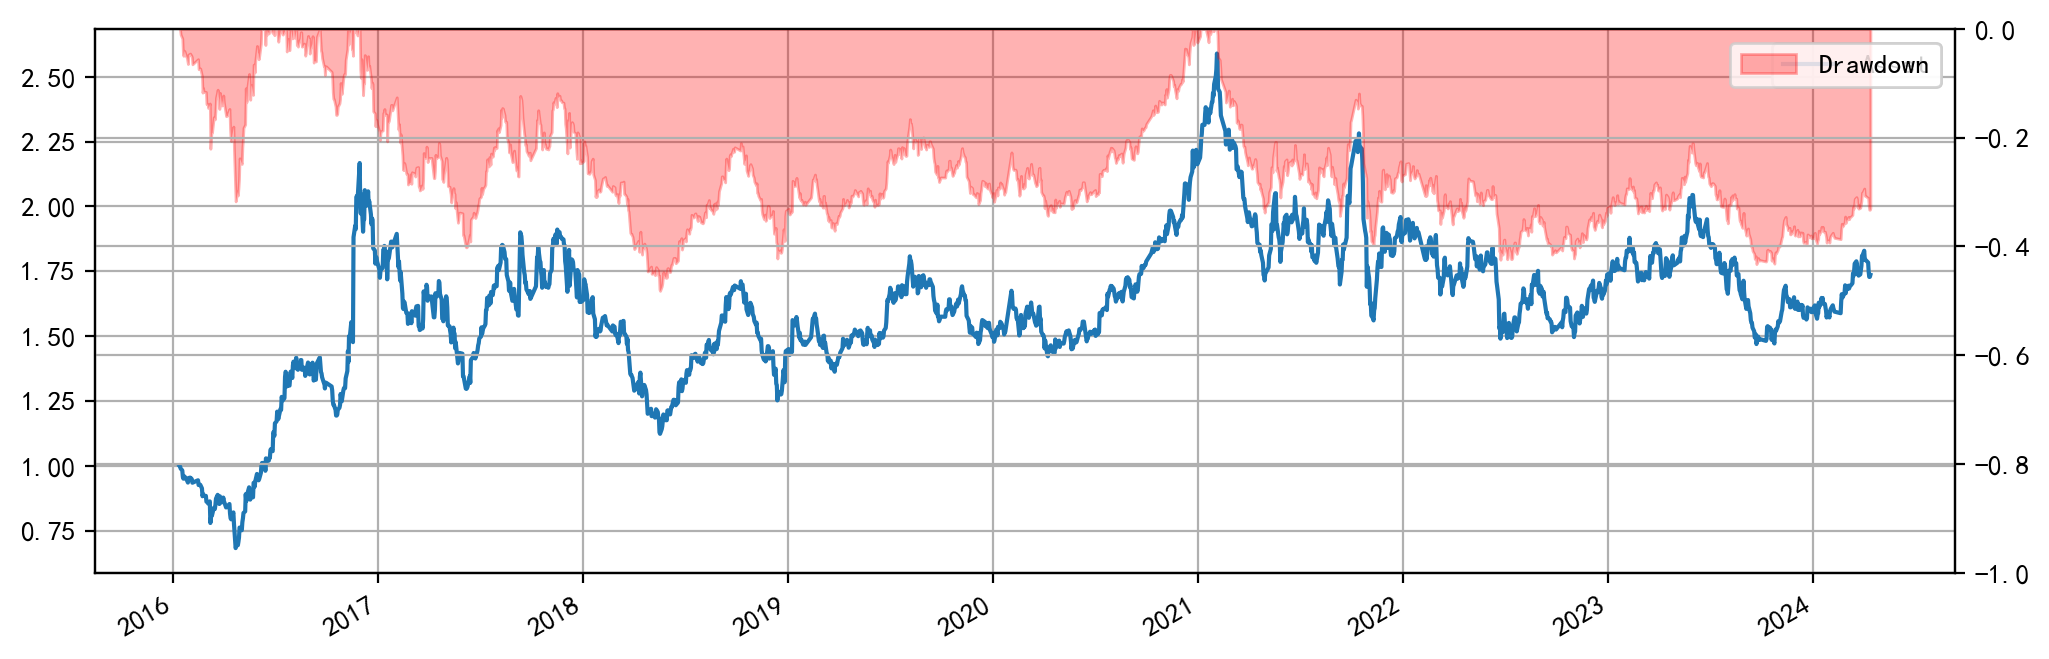

In [209]:
posi = I_S006273513 / I_S006273513.abs()
posi = posi.replace(np.nan, 0)
price = opens['black'].dropna()
price, posi = price.align(posi, join='inner')
price.name = posi.name = 'black'
nwm = strat_test.NetWorthMaker(price, posi)
nwm.plot()

In [115]:
def test_params(name, end_date, ema_alpha=1/20, ts_rank_w=75):
    factor = pd.read_csv(f'{factor_dir}/real_estate.csv',index_col=0, parse_dates=True)[name]
    factor = factor.loc[:pd.to_datetime(end_date)]
    factor = utils.ema(factor, ema_alpha)
    # factor = factor.diff()
    factor = utils.ts_rank(factor, ts_rank_w, "dynamic") - 0.5
    posi = factor / factor.abs()
    posi = posi.replace(np.nan, 0)
    price = opens['black'].dropna()
    price, posi = price.align(posi, join='inner')
    price.name = posi.name = 'black'
    nwm = strat_test.NetWorthMaker(price, posi)
    return nwm, posi

In [116]:
alphas = range(5, 101, 5)
ws = range(2, 20)
rets = pd.DataFrame(index=alphas, columns=ws)

for alpha in tqdm(alphas):
    for w in ws:
        
        nwm, _ = test_params(name, end_date, ema_alpha=1/alpha, ts_rank_w=w)
        rets.loc[alpha, w] = nwm.get_total().loc['calmar']

  0%|          | 0/20 [00:00<?, ?it/s]

In [117]:
rets.apply(pd.to_numeric).style.background_gradient(axis=None).format("{:.2f}")

<Axes: >

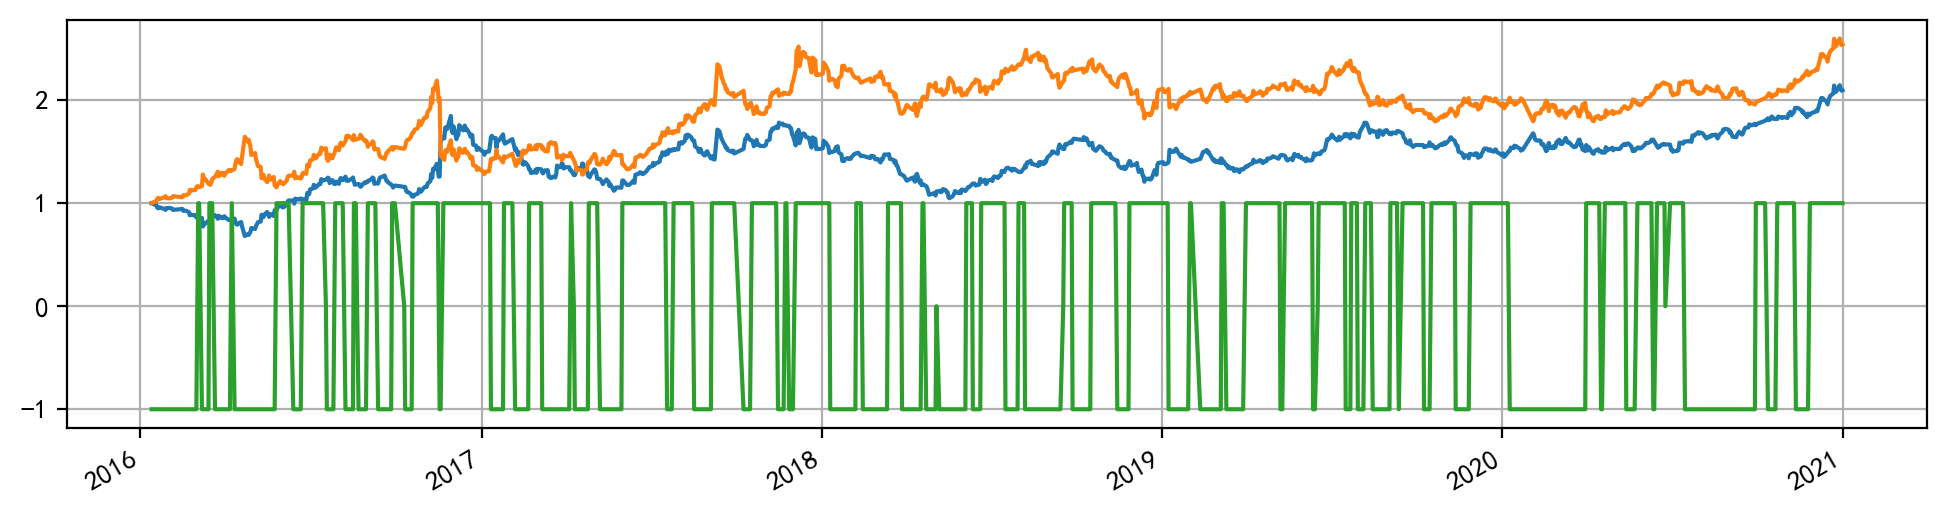

In [121]:
nwm, posi_1 = test_params(name, end_date, ema_alpha=1/45, ts_rank_w=7)
plt.plot(nwm.get_networth(), label='networth')
plt.plot(utils.scale(opens['black'], "1stvalue"))
posi_1.plot()

## I_S004543083
全国城市二手房出售挂牌价指数:当周值

Text(0.5, 1.0, 'I_S004543083')

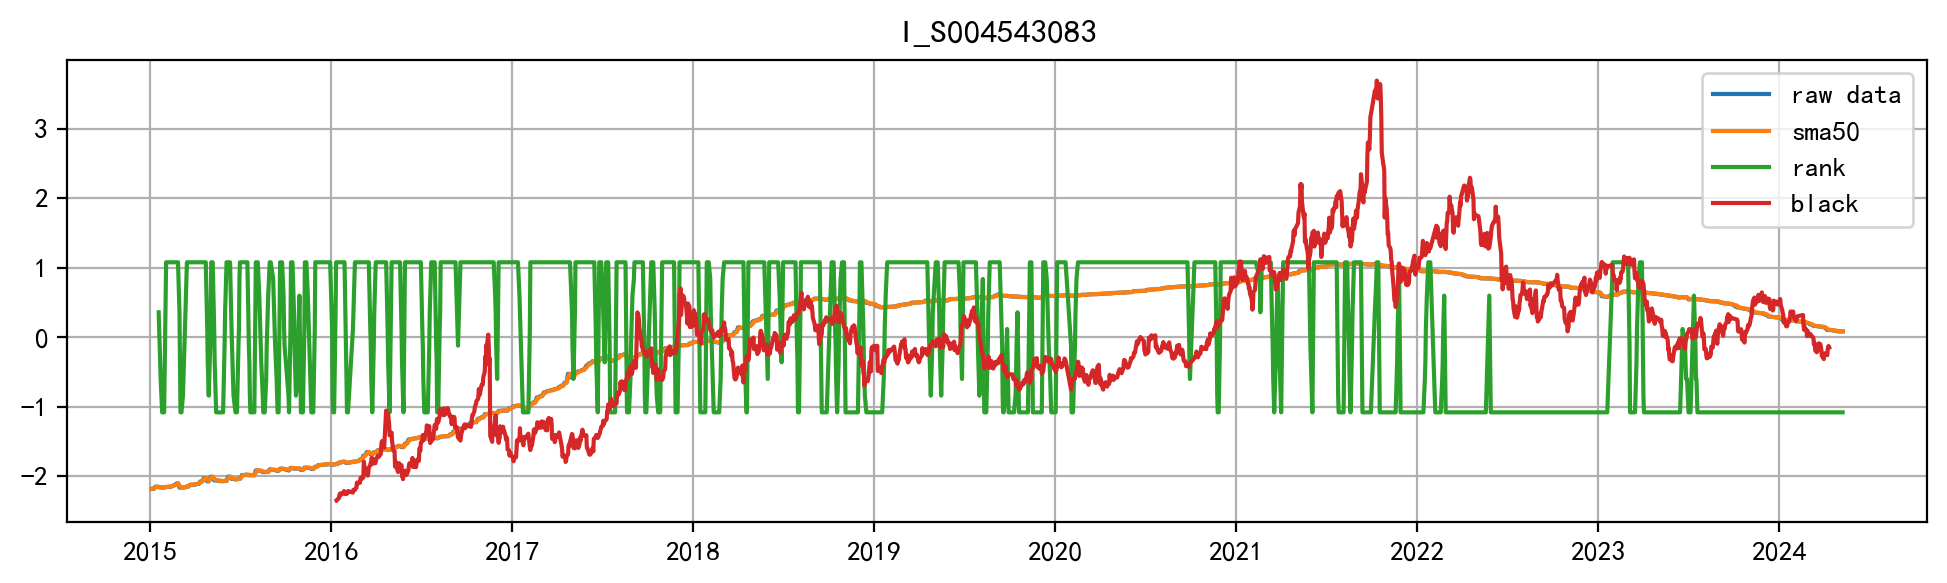

In [9]:
name = "I_S004543083"
I_S004543083 = pd.read_csv(f'{factor_dir}/real_estate.csv',index_col=0, parse_dates=True)[name]
I_S004543083 = I_S004543083.loc[:end_date]
plt.plot(utils.scale(I_S004543083), label='raw data')
I_S004543083 = utils.ema(I_S004543083, 1/2)
plt.plot(utils.scale(I_S004543083), label='sma50')
I_S004543083 = utils.ts_rank(I_S004543083, 10, "dynamic") - 0.5
plt.plot(utils.scale(I_S004543083, how='divstd'), label='rank')
# I_S004543083 = I_S004543083.diff()
# plt.plot(utils.scale(I_S004543083, how='standard'), label='diff')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

In [10]:
def test_params(name, end_date, ema_alpha=1/10, ts_rank_w=30):
    factor = pd.read_csv(f'{factor_dir}/real_estate.csv',index_col=0, parse_dates=True)[name]
    factor = factor.loc[:pd.to_datetime(end_date)]
    factor = utils.ema(factor, ema_alpha)
    # factor = factor.diff()
    factor = utils.ts_rank(factor, ts_rank_w, "numpy") - 0.5
    posi = factor / factor.abs()
    posi = posi.replace(np.nan, 0)
    price = opens['black'].dropna()
    price, posi = price.align(posi, join='inner')
    price.name = posi.name = 'rb'
    nwm = strat_test.NetWorth(price, posi)
    return nwm, posi

In [412]:
alphas = range(1, 10)
rets = pd.DataFrame(index=[0], columns=alphas)

for alpha in tqdm(alphas):
    nwm, _ = test_params(name, end_date, ema_alpha=1/alpha)
    rets.loc[0, alpha] = nwm.get_total().loc['calmar']

  0%|          | 0/9 [00:00<?, ?it/s]

In [413]:
rets

1     2     3     4     5     6     7     8     9
0  0.67  1.02  1.12  1.09  0.47  0.53  0.35  0.36  0.43

<Axes: >

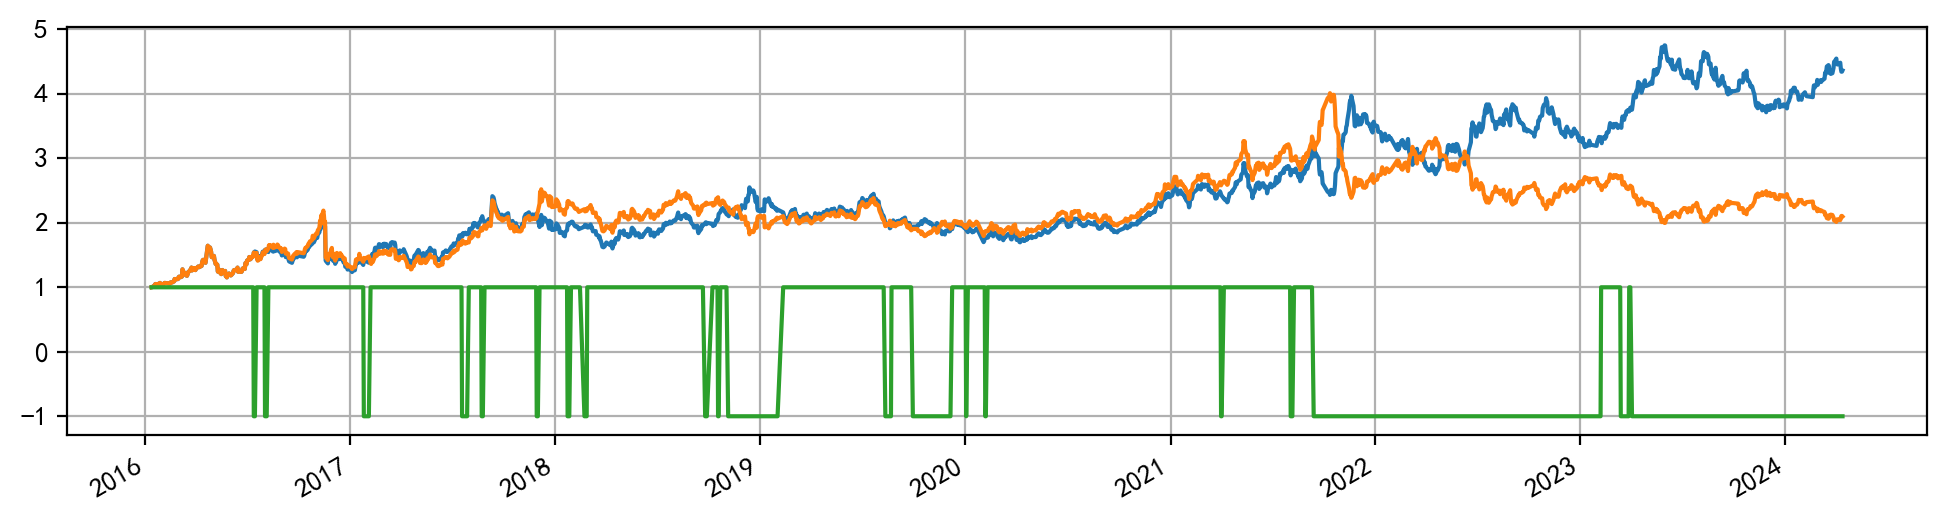

In [11]:
nwm, posi_3 = test_params(name, end_date, ema_alpha=1/2, ts_rank_w=30)
plt.plot(nwm.get_networth(), label='networth')
plt.plot(utils.scale(opens['black'], "1stvalue"))
posi_3.plot()

## I_M001620724
房地产开发投资:累计同比

Text(0.5, 1.0, 'I_M001620724')

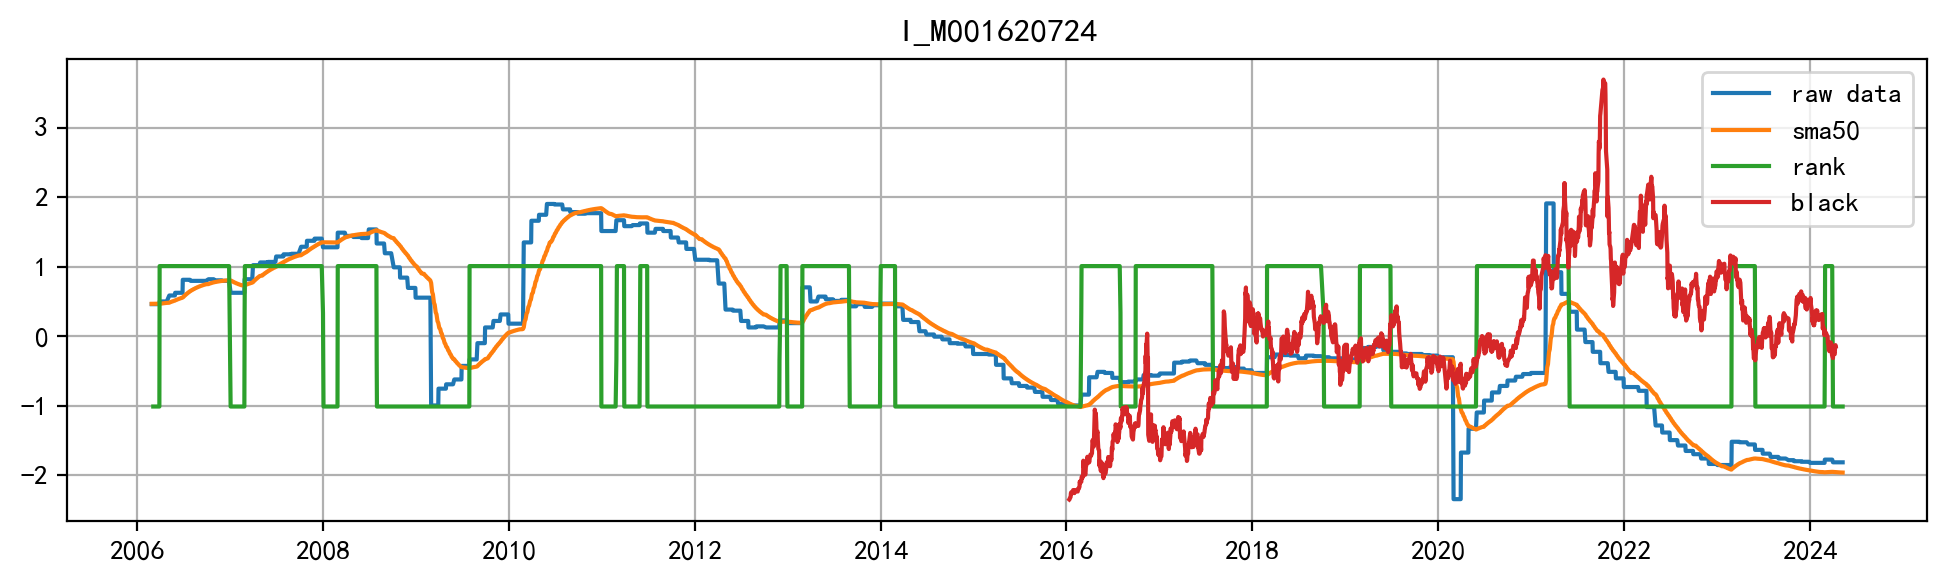

In [210]:
name = "I_M001620724"
I_M001620724 = pd.read_csv(f'{factor_dir}/real_estate.csv',index_col=0, parse_dates=True)[name]
I_M001620724 = I_M001620724.loc[:end_date]
plt.plot(utils.scale(I_M001620724), label='raw data')
I_M001620724 = utils.ema(I_M001620724, 1/55)
plt.plot(utils.scale(I_M001620724), label='sma50')
I_M001620724 = utils.ts_rank(I_M001620724, 4, "dynamic") - 0.5
plt.plot(utils.scale(I_M001620724, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

In [211]:
def test_params(name, end_date, ema_alpha, ts_rank_w):
    factor = pd.read_csv(f'{factor_dir}/real_estate.csv',index_col=0, parse_dates=True)[name]
    factor = factor.loc[:pd.to_datetime(end_date)]
    factor = utils.ema(factor, ema_alpha)
    factor = utils.ts_rank(factor, ts_rank_w, "dynamic") - 0.5
    posi = factor / factor.abs()
    posi = posi.replace(np.nan, 0)
    price = opens['black'].dropna()
    price, posi = price.align(posi, join='inner')
    price.name = posi.name = 'rb'
    nwm = strat_test.NetWorthMaker(price, posi)
    return nwm, posi

In [138]:
alphas = range(5, 101, 5)
ws = range(2, 10, 1)
rets = pd.DataFrame(index=alphas, columns=ws)

for alpha in tqdm(alphas):
    for w in ws:
        nwm, _ = test_params(name, end_date, ema_alpha=1/alpha, ts_rank_w=w)
        rets.loc[alpha, w] = nwm.get_total().loc['calmar']

  0%|          | 0/20 [00:00<?, ?it/s]

In [139]:
rets.apply(pd.to_numeric).style.background_gradient(axis=None).format("{:.2f}")

<Axes: >

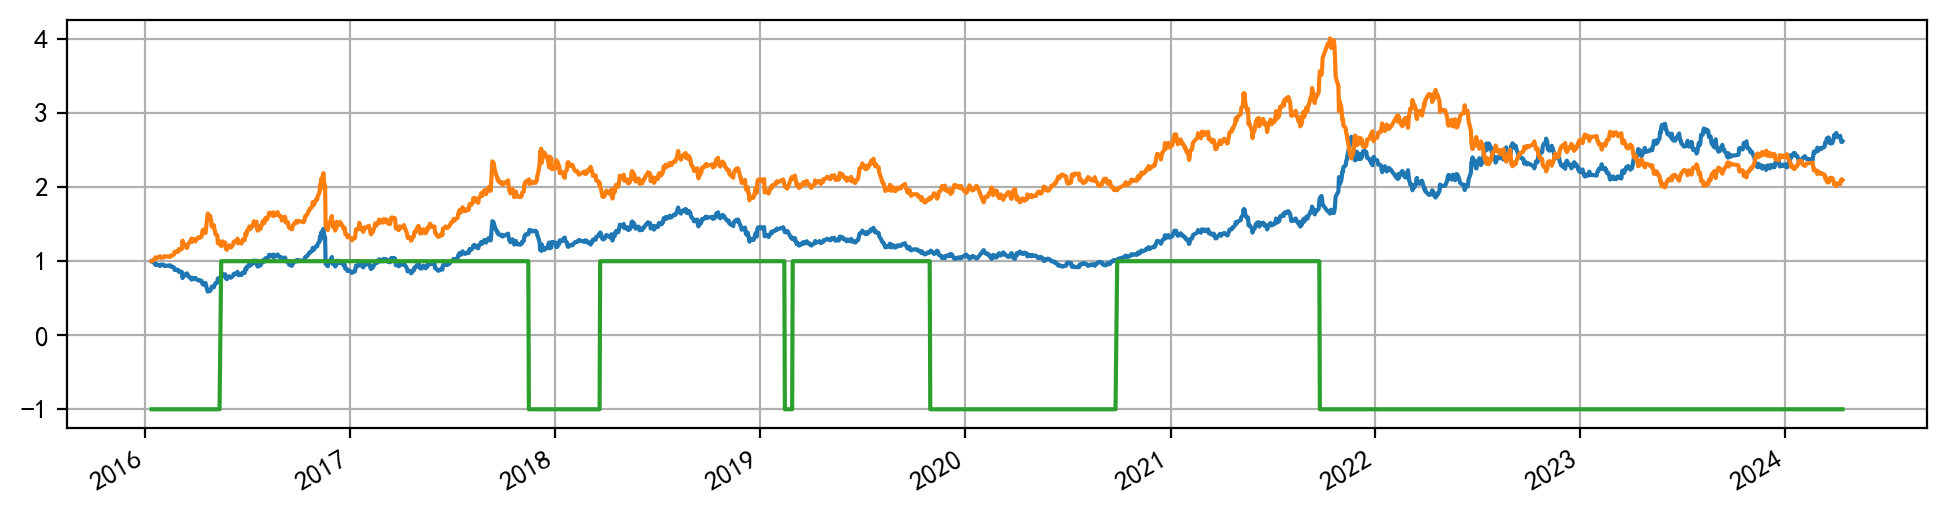

In [216]:
nwm, posi_4 = test_params(name, end_date, ema_alpha=1/55, ts_rank_w=250)
plt.plot(nwm.get_networth(), label='networth')
plt.plot(utils.scale(opens['black'], "1stvalue"))
posi_4.plot()

## I_M002807944
房地产开发投资:当月同比

Text(0.5, 1.0, 'I_M002807944')

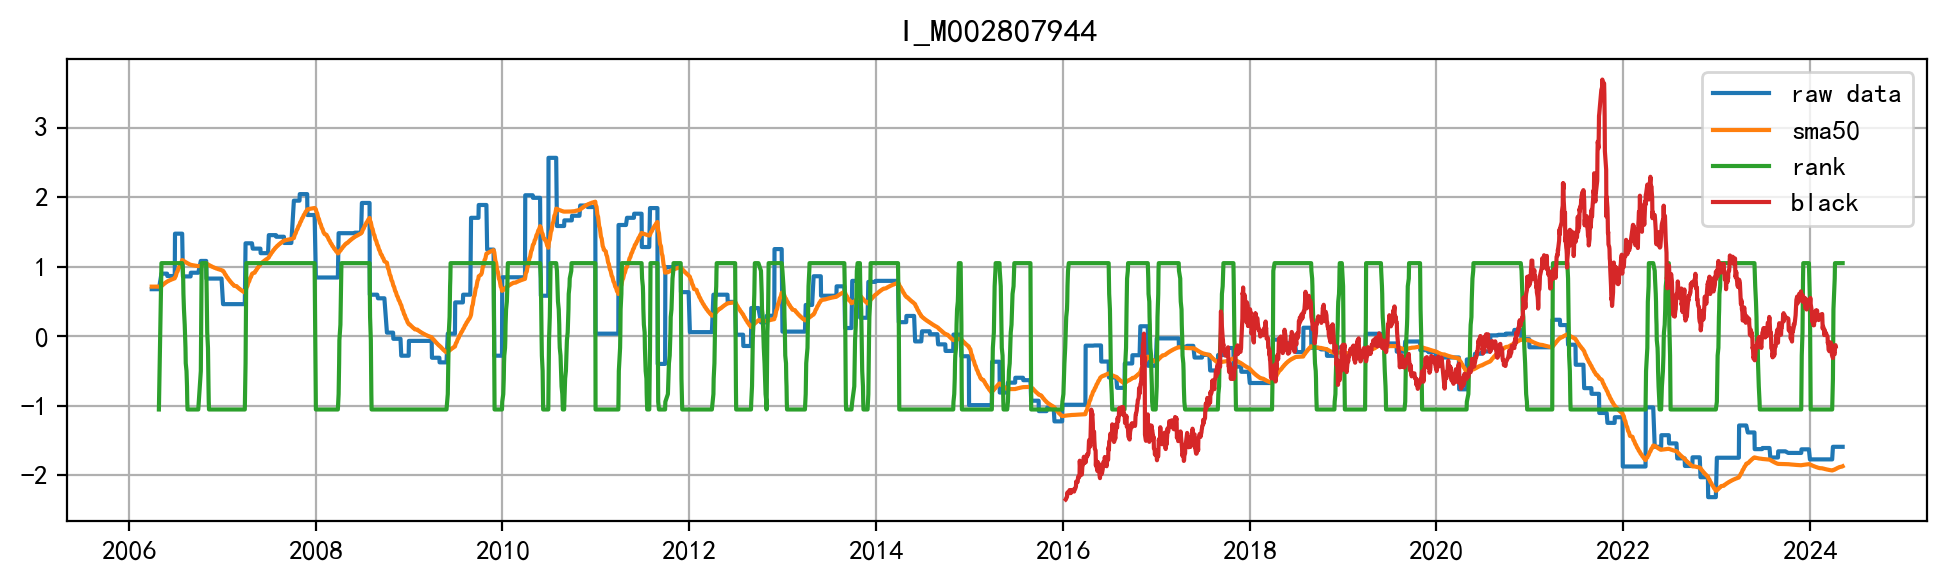

In [289]:
name = "I_M002807944"
I_M002807944 = pd.read_csv(f'{factor_dir}/real_estate.csv',index_col=0, parse_dates=True)[name]
I_M002807944 = I_M002807944.loc[:end_date]
plt.plot(utils.scale(I_M002807944), label='raw data')
I_M002807944 = utils.ema(I_M002807944, 1/50)
plt.plot(utils.scale(I_M002807944), label='sma50')
I_M002807944 = utils.ts_rank(I_M002807944, 20, "dynamic") - 0.5
plt.plot(utils.scale(I_M002807944, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

In [291]:
def test_params(name, end_date, ema_alpha, ts_rank_w):
    factor = pd.read_csv(f'{factor_dir}/real_estate.csv',index_col=0, parse_dates=True)[name]
    factor = factor.loc[:pd.to_datetime(end_date)]
    factor = utils.ema(factor, ema_alpha)
    factor = utils.ts_rank(factor, ts_rank_w, "dynamic") - 0.5
    posi = factor / factor.abs()
    posi = posi.replace(np.nan, 0)
    price = opens['black'].dropna()
    price, posi = price.align(posi, join='inner')
    price.name = posi.name = 'black'
    nwm = strat_test.NetWorthMaker(price, posi)
    return nwm, posi

In [157]:
alphas = range(5, 101, 5)
ws = range(5, 201, 5)
rets = pd.DataFrame(index=alphas, columns=ws)

for alpha in tqdm(alphas):
    for w in ws:
        nwm, _ = test_params(name, end_date, ema_alpha=1/alpha, ts_rank_w=w)
        rets.loc[alpha, w] = nwm.get_total().loc['calmar']

  0%|          | 0/20 [00:00<?, ?it/s]

In [101]:
rets.apply(pd.to_numeric).style.background_gradient(axis=None).format("{:.2f}")

NameError: name 'rets' is not defined

<Axes: >

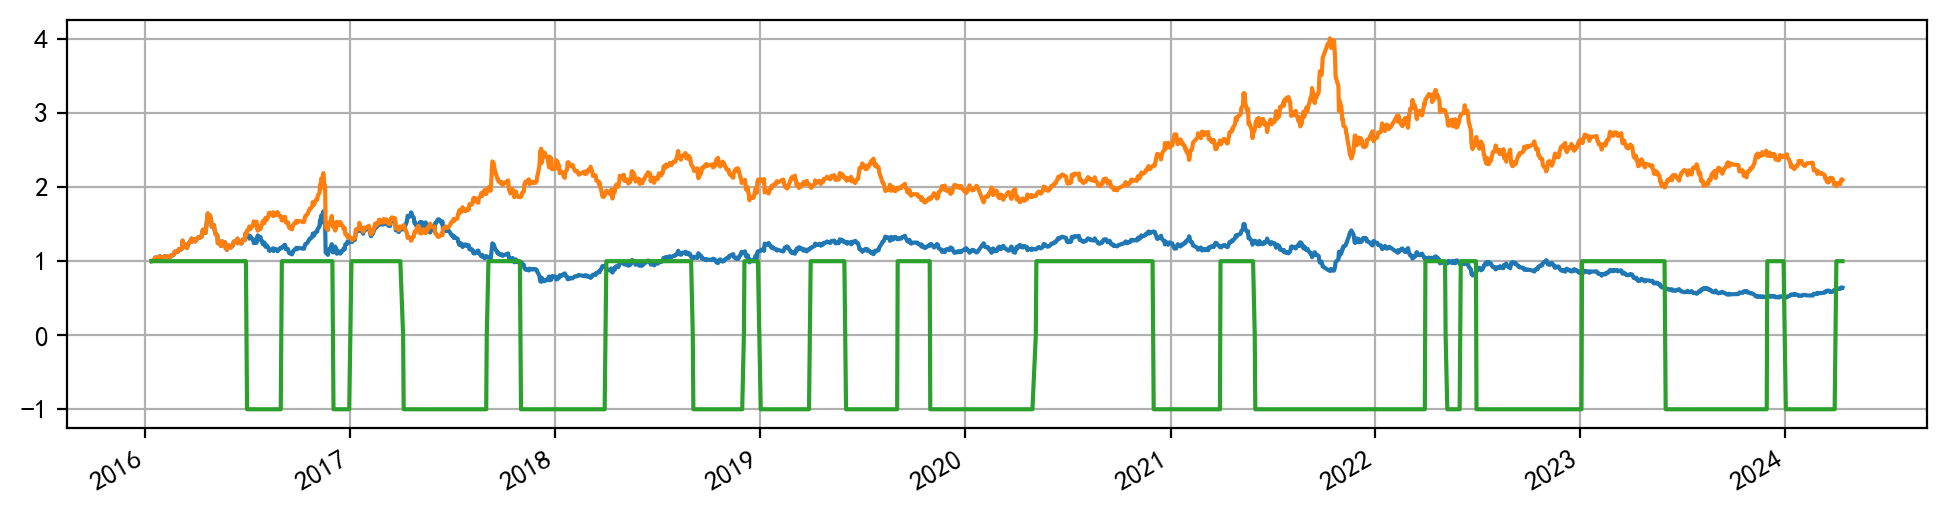

In [297]:
nwm, posi_5 = test_params(name, end_date, ema_alpha=1/50, ts_rank_w=5)
plt.plot(nwm.get_networth(), label='networth')
plt.plot(utils.scale(opens['black'], "1stvalue"))
posi_5.plot()

## I_S002811507
汽车产量:乘用车:累计同比

Text(0.5, 1.0, 'I_S002811507')

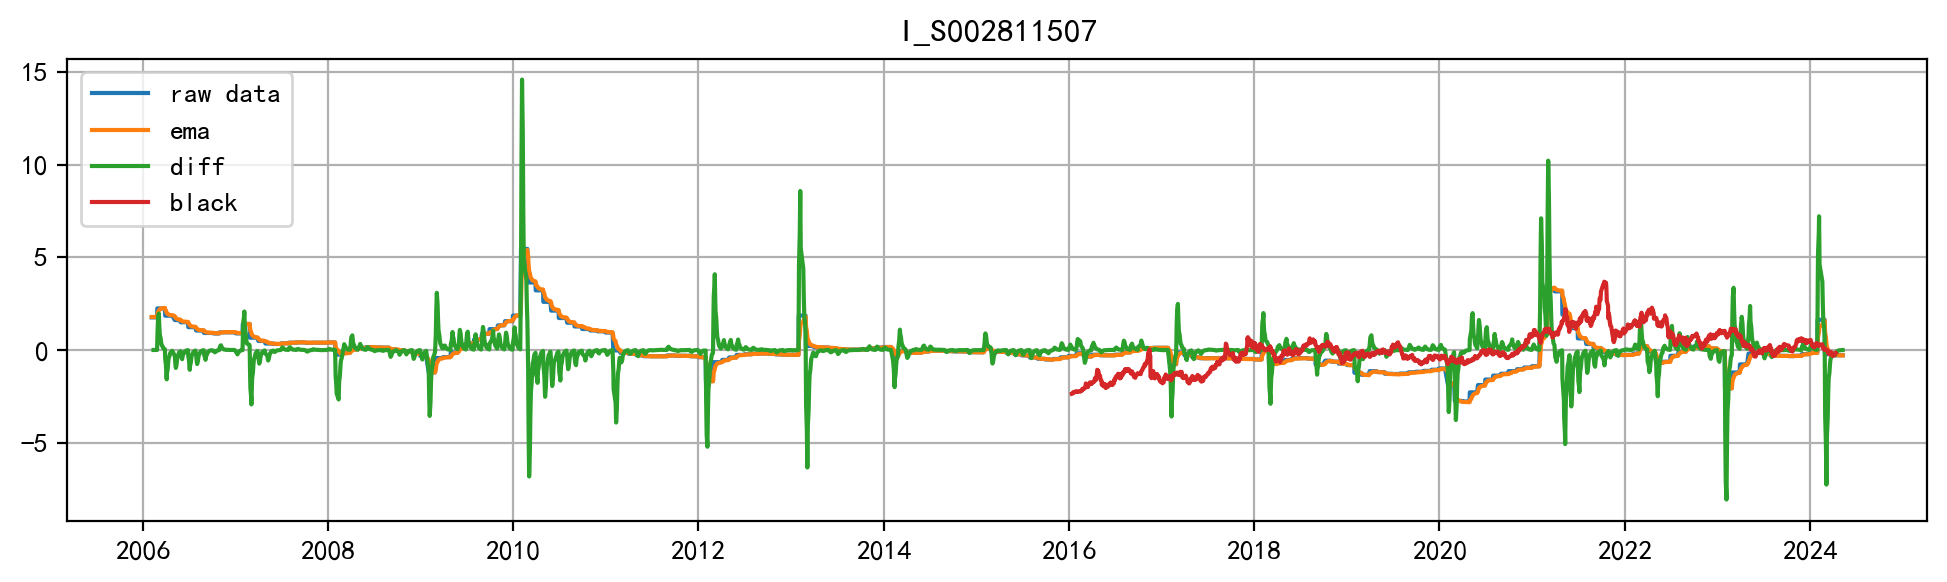

In [298]:
name = "I_S002811507"
I_S002811507 = pd.read_csv(f'{factor_dir}/auto.csv',index_col=0, parse_dates=True)[name]
I_S002811507 = I_S002811507.loc[:end_date]
plt.plot(utils.scale(I_S002811507), label='raw data')
I_S002811507 = utils.ema(I_S002811507, 1/5)
plt.plot(utils.scale(I_S002811507), label='ema')
I_S002811507 = I_S002811507.diff(5)
plt.plot(utils.scale(I_S002811507), label='diff')
# I_S002811507 = utils.ts_rank(I_S002811507, 90, "dynamic") - 0.5
# plt.plot(utils.scale(I_S002811507, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

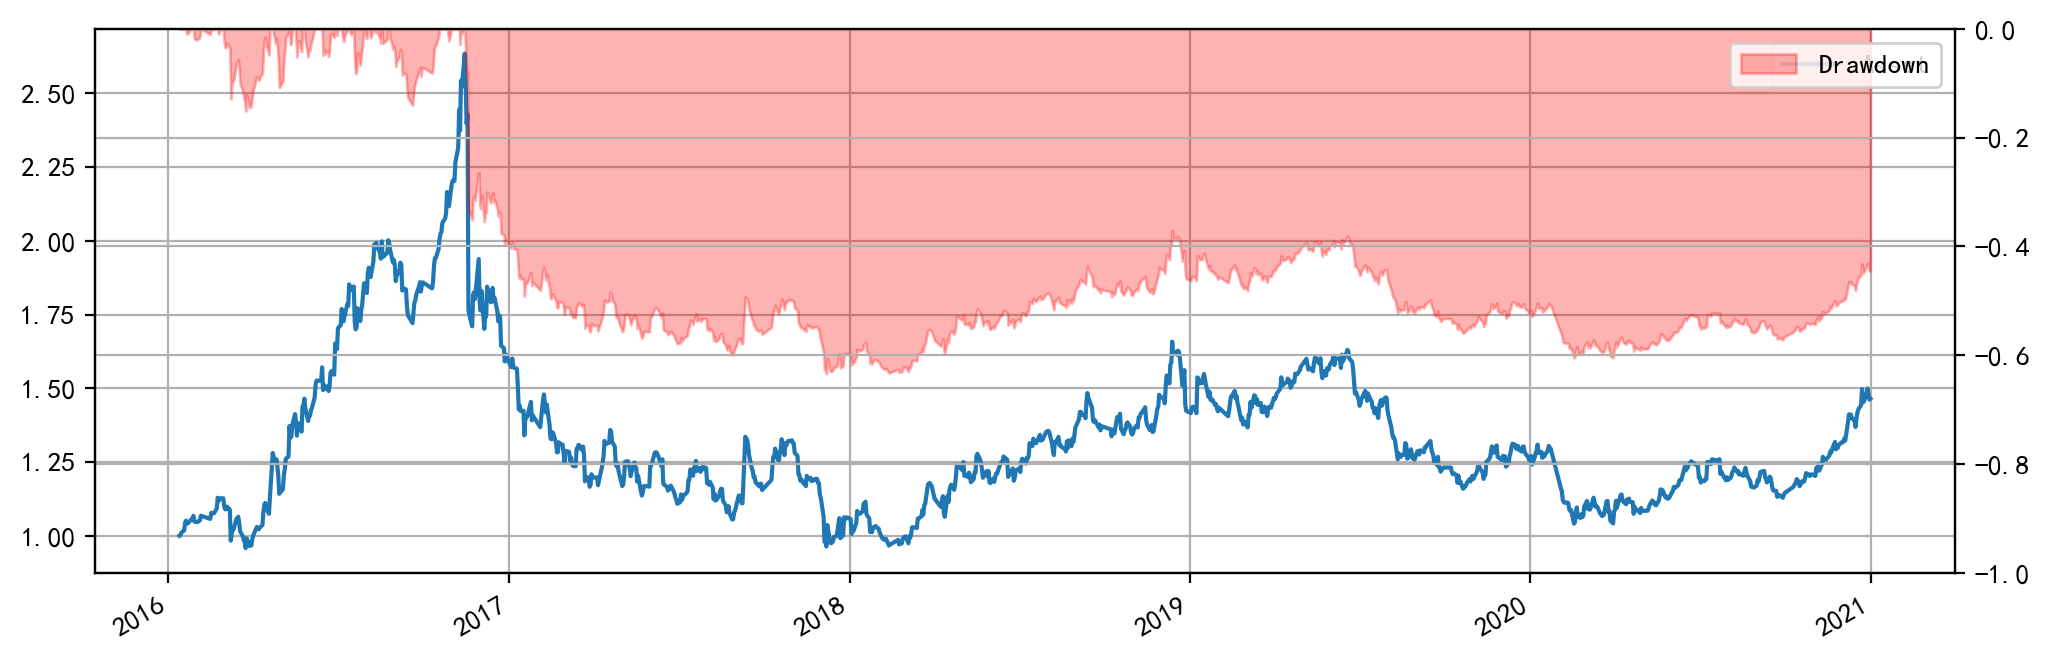

In [161]:
posi = I_S002811507 / I_S002811507.abs()
posi = posi.replace(np.nan, 0)
price, posi = opens['black'].dropna().align(posi, join='inner')
price.name = posi.name = "black"
nwm = strat_test.NetWorthMaker(price, posi)
nwm.plot()

In [299]:
def test_params(name, end_date, ema_alpha=1/20, ts_rank_w=75):
    factor = pd.read_csv(f'{factor_dir}/auto.csv',index_col=0, parse_dates=True)[name]
    factor = factor.loc[:pd.to_datetime(end_date)]
    factor = utils.ema(factor, ema_alpha)
    factor = utils.ts_rank(factor, ts_rank_w, "dynamic") - 0.5
    posi = factor / factor.abs()
    posi = posi.replace(np.nan, 0)
    price, posi = opens['black'].dropna().align(posi, join='inner')
    price.name = posi.name = 'hc'
    nwm = strat_test.NetWorthMaker(price, posi)
    return nwm, posi

In [163]:
alphas = range(2, 10)
ws = range(5, 101, 5)
rets = pd.DataFrame(index=alphas, columns=ws)

for alpha in tqdm(alphas):
    for w in ws:
        nwm, _ = test_params(name, end_date, ema_alpha=1/alpha, ts_rank_w=w)
        rets.loc[alpha, w] = nwm.get_total().loc['calmar']

  0%|          | 0/8 [00:00<?, ?it/s]

In [164]:
rets.apply(pd.to_numeric).style.background_gradient(axis=None).format("{:.2f}")

days  acc.%  ret.%  std.%  mdd.%  calmar  sharpe  tr.%  long.%  \
2016    237  57.81  50.84  47.44  39.62    1.28    1.07  1.69   83.54   
2017    244  45.49 -39.65  41.18  53.19   -0.75   -0.96  2.87   18.44   
2018    243  49.79  15.11  29.90  14.15    1.07    0.51  2.47   35.80   
2019    244  49.59  -3.50  23.33  24.59   -0.14   -0.15  1.23   55.74   
2020    243  53.50  15.25  24.55  20.47    0.75    0.62  0.82   74.49   
2021    243  48.15   7.15  33.15  35.96    0.20    0.22  0.41   30.04   
2022    242  51.65  22.08  28.54  20.58    1.07    0.77  1.65   64.46   
2023    242  50.00 -11.79  21.83  27.04   -0.44   -0.54  1.24   46.28   
2024     66  48.48  -7.28   9.33  11.33   -0.64   -0.78  1.52   65.15   
total  2004  50.80   2.94  32.56  67.33    0.04    0.09  1.55   51.45   

       short.%   abs.%  
2016     16.03   99.58  
2017     80.33   98.77  
2018     63.37   99.18  
2019     43.85   99.59  
2020     25.51  100.00  
2021     69.55   99.59  
2022     34.30   98.76  
2023     53.31   99.59  
2024     34.85  100.00  
total    47.95   99.40

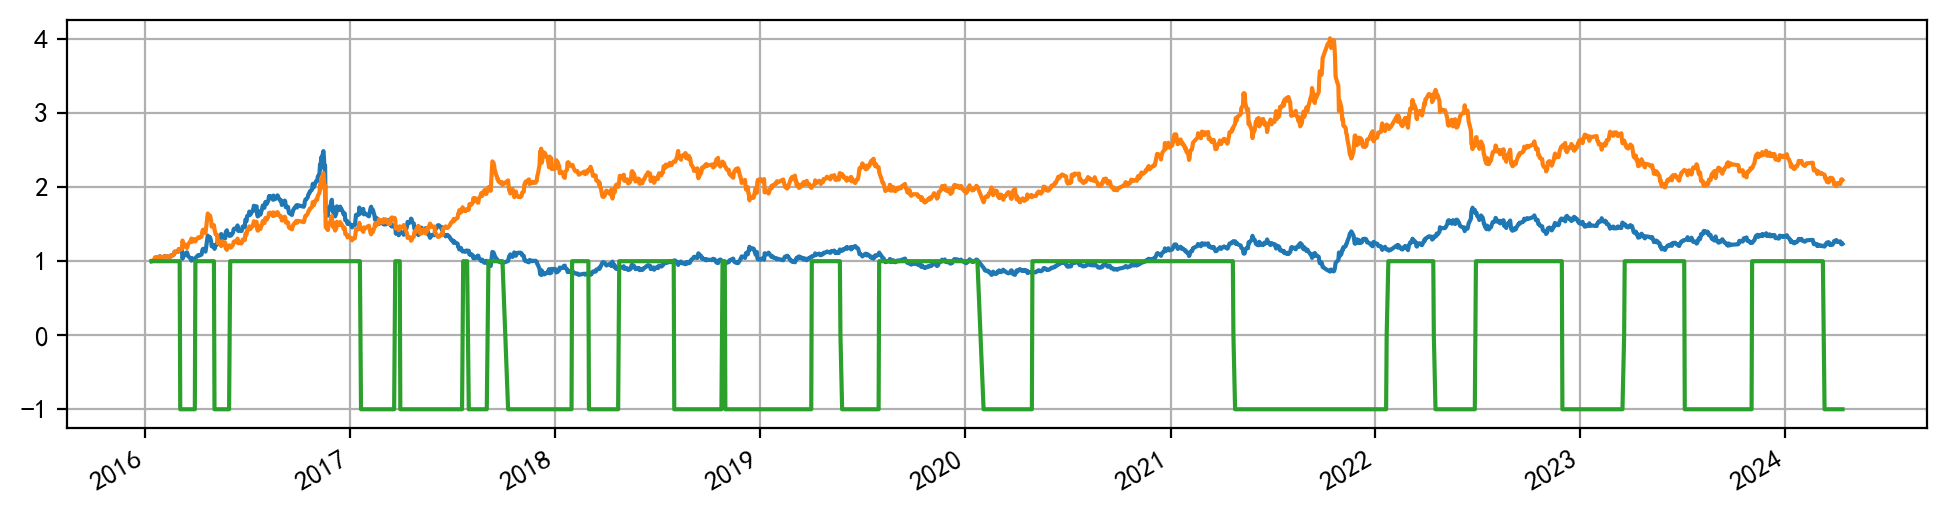

In [300]:
nwm, posi_1 = test_params(name, end_date, ema_alpha=1/3, ts_rank_w=65)
plt.plot(nwm.get_networth(), label='networth')
plt.plot(utils.scale(opens['black'], "1stvalue"))
posi_1.plot()
nwm.get_annual()

## I_S002811485
汽车产量:乘用车:当月同比

Text(0.5, 1.0, 'I_S002811485')

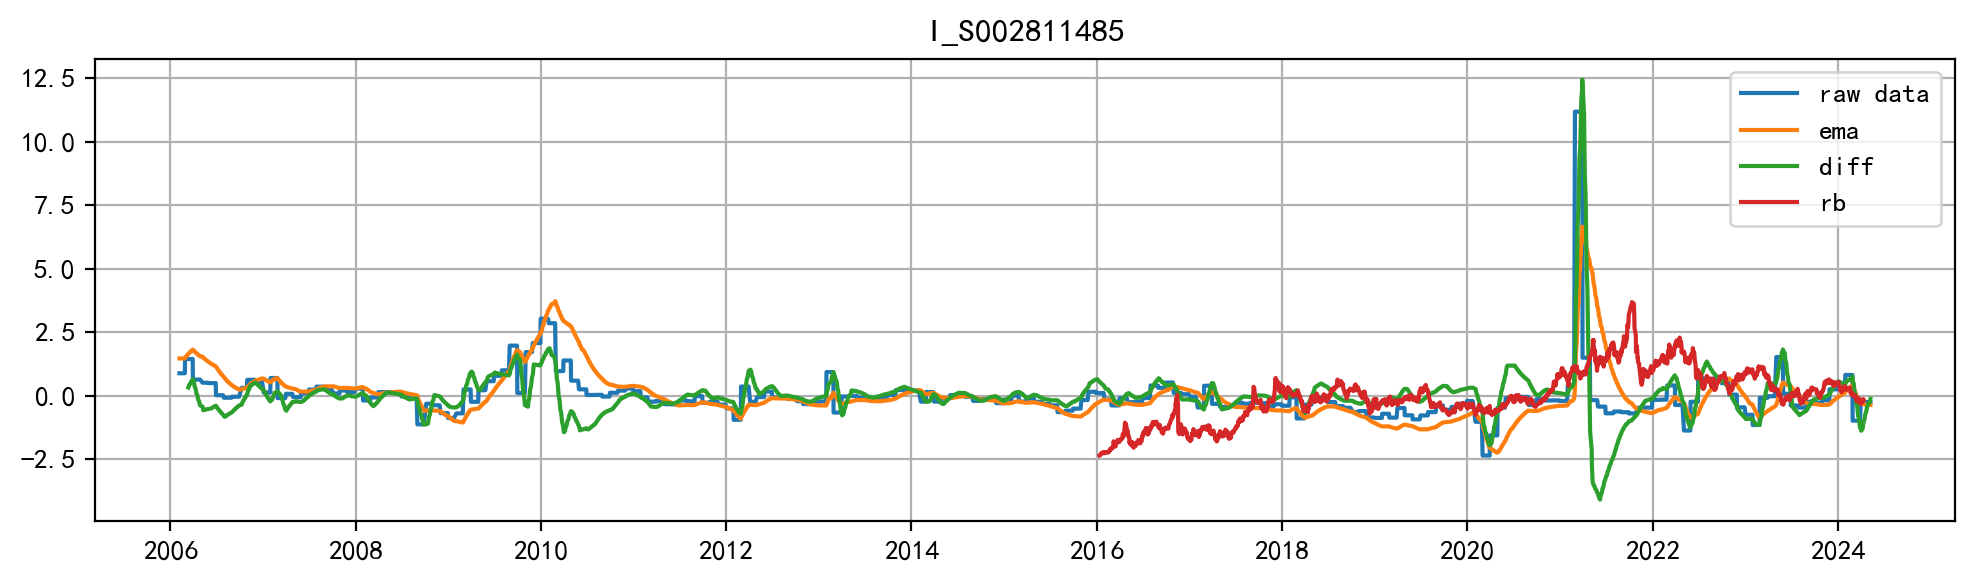

In [219]:
name = "I_S002811485"
I_S002811485 = pd.read_csv(f'{factor_dir}/auto.csv',index_col=0, parse_dates=True)[name]
I_S002811485 = I_S002811485.loc[:end_date]
plt.plot(utils.scale(I_S002811485), label='raw data')
I_S002811485 = utils.ema(I_S002811485, 1/50)
plt.plot(utils.scale(I_S002811485), label='ema')
I_S002811485 = I_S002811485.diff(25)
plt.plot(utils.scale(I_S002811485), label='diff')
# I_S002811485 = utils.ts_rank(I_S002811485, 100, "dynamic") - 0.5
# plt.plot(utils.scale(I_S002811485, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='rb')
plt.legend()
plt.title(name)

In [301]:
def test_params(name, end_date, ema_alpha=1/20, diff_w=75):
    factor = pd.read_csv(f'{factor_dir}/auto.csv',index_col=0, parse_dates=True)[name]
    factor = factor.loc[:pd.to_datetime(end_date)]
    factor = utils.ema(factor, ema_alpha)
    factor = factor.diff(diff_w)
    posi = factor / factor.abs()
    posi = posi.replace(np.nan, 0)
    price, posi = opens['black'].dropna().align(posi, join='inner')
    price.name = posi.name = 'black'
    nwm = strat_test.NetWorthMaker(price, posi)
    return nwm, posi

In [328]:
alphas = range(2, 20)
ws = range(2, 20)
rets = pd.DataFrame(columns=ws, index=alphas)

for alpha in tqdm(alphas):
    for w in ws:
        nwm, _ = test_params(name, end_date, ema_alpha=1/alpha, diff_w=w)
        rets.loc[alpha, w] = nwm.get_total().loc['calmar']

  0%|          | 0/18 [00:00<?, ?it/s]

In [329]:
rets.apply(pd.to_numeric).style.background_gradient(axis=None).format("{:.2f}")

days  acc.%  ret.%  std.%  mdd.%  calmar  sharpe  tr.%  long.%  \
2016    237  56.54  10.78  47.54  39.62    0.27    0.23  1.69   73.84   
2017    244  47.54 -31.29  41.39  37.65   -0.83   -0.76  2.87   26.64   
2018    243  52.67  37.74  29.95  14.15    2.67    1.26  2.47   46.09   
2019    244  49.59 -12.12  23.34  28.86   -0.42   -0.52  1.23   51.64   
2020    243  53.50  15.25  24.55  20.47    0.75    0.62  0.82   74.49   
2021    243  49.38  15.97  33.18  35.96    0.44    0.48  0.41   32.10   
2022    242  51.24  20.02  28.70  22.49    0.89    0.70  1.65   65.29   
2023    242  49.17 -19.36  21.84  31.20   -0.62   -0.89  1.24   51.65   
2024     66  54.55  -4.53   9.36  10.88   -0.42   -0.48  1.52   56.06   
total  2004  51.45   1.58  32.63  62.81    0.03    0.05  1.55   52.74   

       short.%  abs.%  
2016     26.16  100.0  
2017     73.36  100.0  
2018     53.91  100.0  
2019     48.36  100.0  
2020     25.51  100.0  
2021     67.90  100.0  
2022     34.71  100.0  
2023     48.35  100.0  
2024     43.94  100.0  
total    47.26  100.0

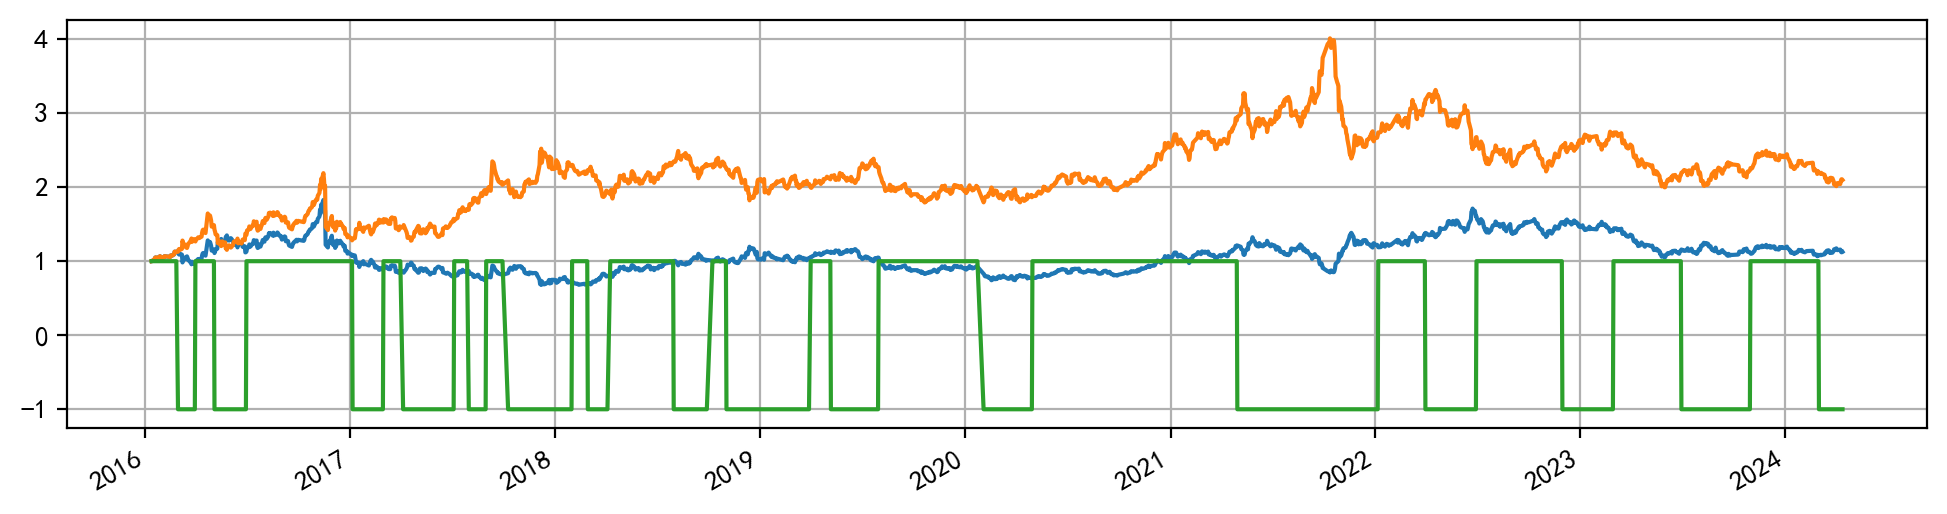

In [302]:
nwm, posi = test_params(name, end_date, ema_alpha=1/9, diff_w=5)
plt.plot(nwm.get_networth(), label='networth')
plt.plot(utils.scale(opens['black'], "1stvalue"))
posi.plot()
nwm.get_annual()

## I_M005383065
发动机:产量:当月同比

Text(0.5, 1.0, 'I_M005383065')

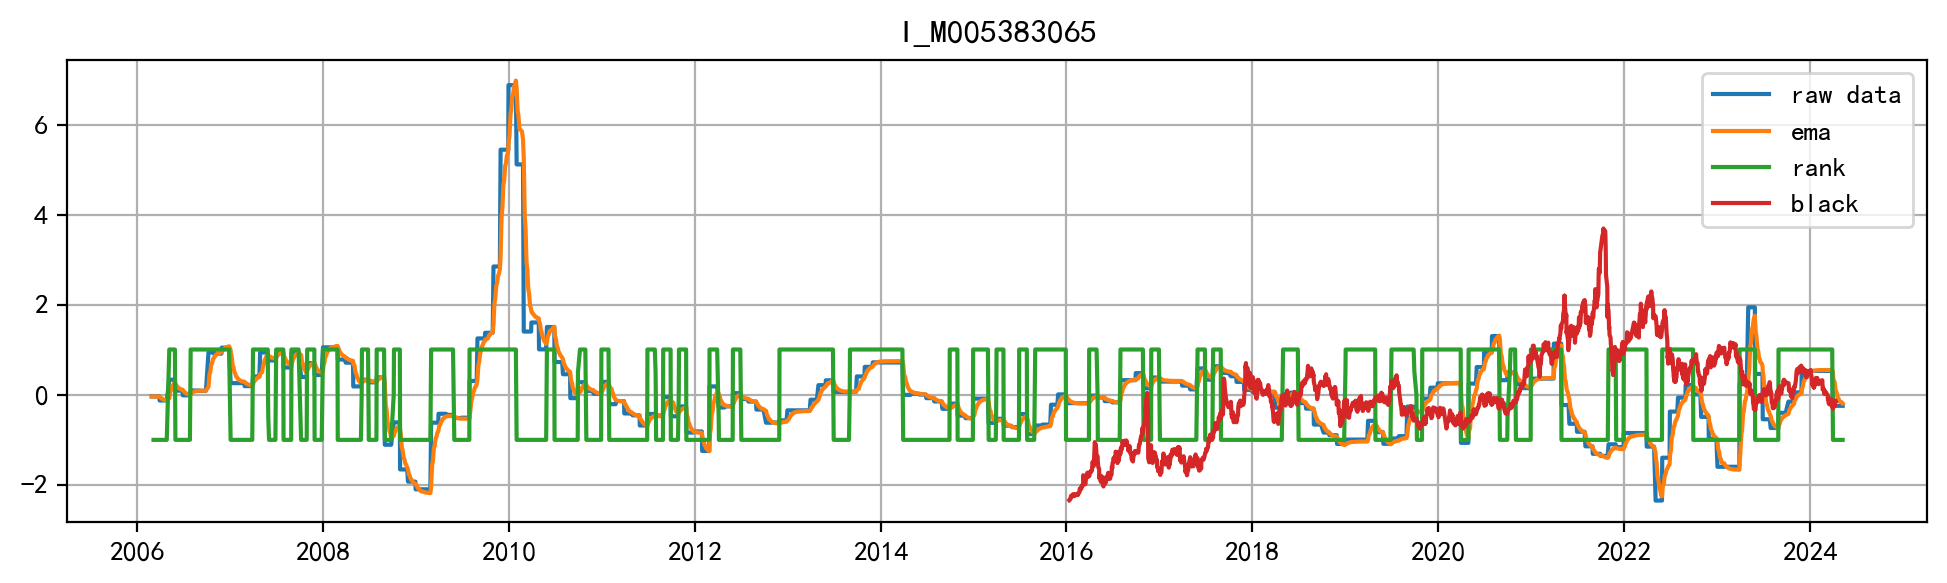

In [220]:
name = "I_M005383065"
I_M005383065 = pd.read_csv(f'{factor_dir}/auto.csv',index_col=0, parse_dates=True)[name]
I_M005383065 = I_M005383065.loc[:end_date]
plt.plot(utils.scale(I_M005383065), label='raw data')
I_M005383065 = utils.ema(I_M005383065, 1/10)
# I_M005383065 = I_M005383065.diff()
# plt.plot(utils.scale(I_M005383065), label='diff')
plt.plot(utils.scale(I_M005383065), label='ema')
I_M005383065 = utils.ts_rank(I_M005383065, 5, "dynamic") - 0.5
plt.plot(utils.scale(I_M005383065, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

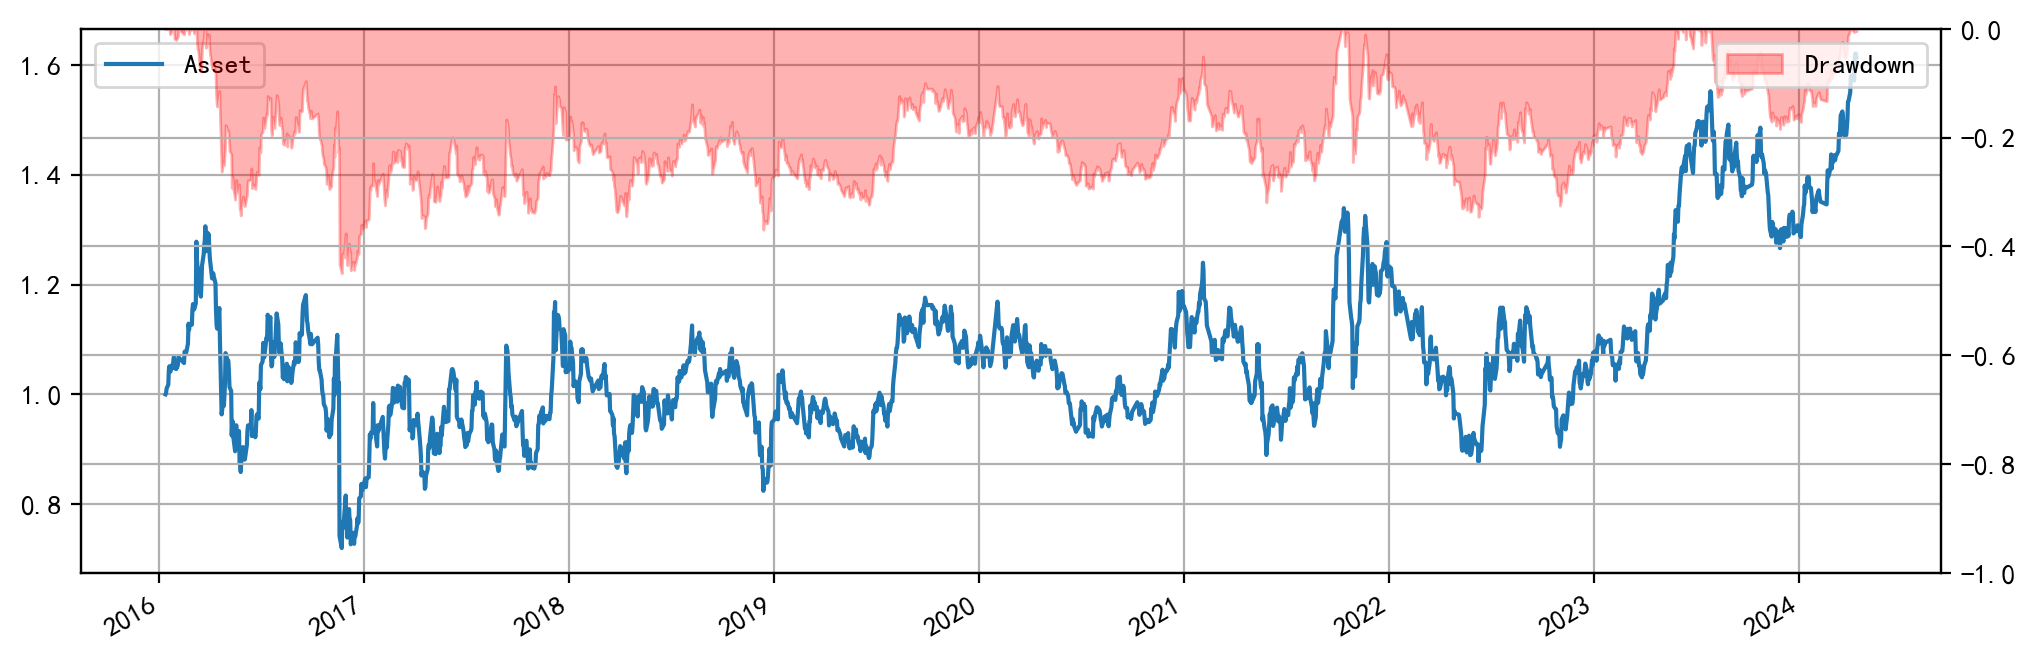

In [222]:
posi = -I_M005383065 / I_M005383065.abs()
posi = posi.replace(np.nan, 0)
price, posi = opens['black'].dropna().align(posi, join='inner')
price.name = posi.name = "black"
nwm = strat_test.NetWorthMaker(price, posi)
nwm.plot()

## I_S005566895
集装箱:出口金额:当月同比

Text(0.5, 1.0, 'I_S005566895')

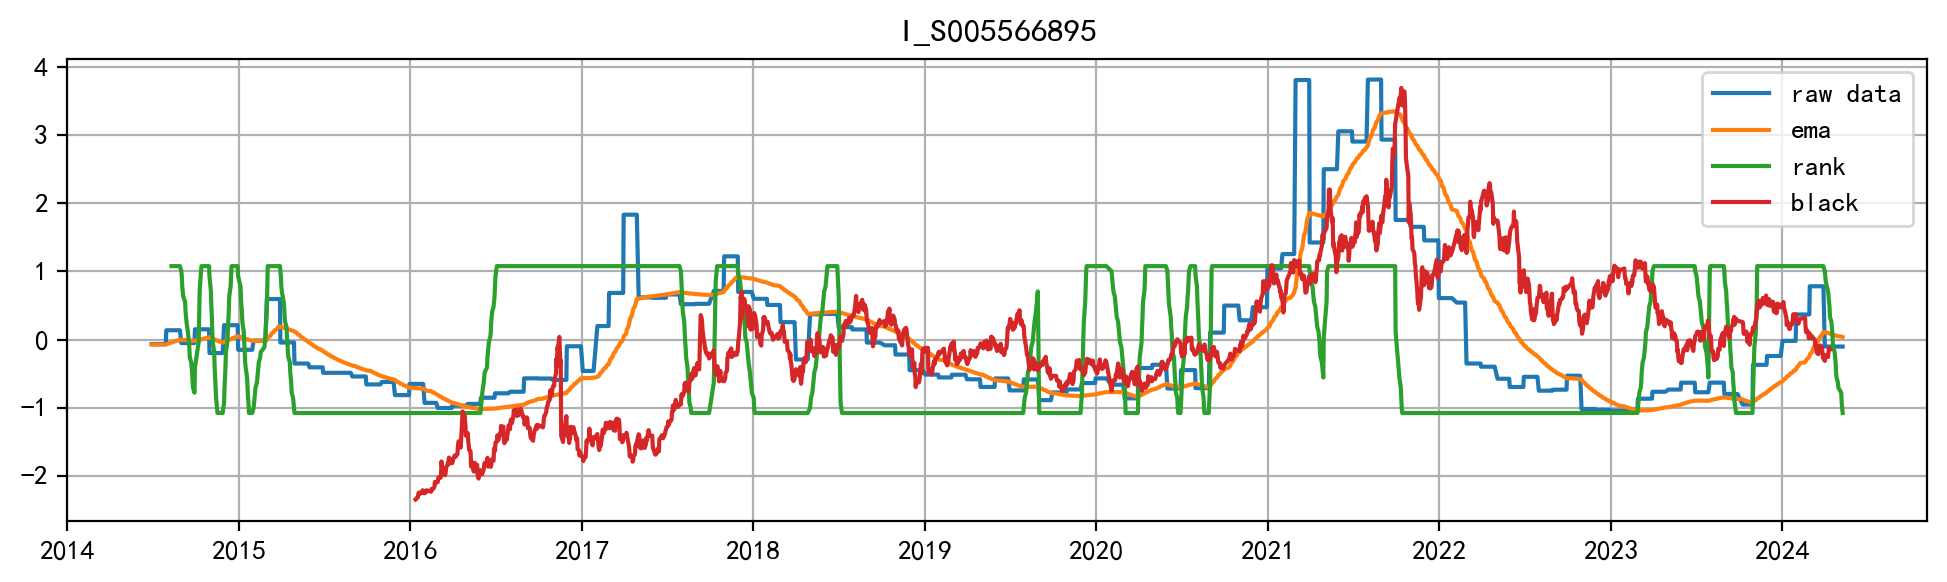

In [415]:
name = "I_S005566895"
I_S005566895 = pd.read_csv(f'{factor_dir}/mech_equip.csv',index_col=0, parse_dates=True)[name]
I_S005566895 = I_S005566895.loc[:end_date]
plt.plot(utils.scale(I_S005566895), label='raw data')
I_S005566895 = utils.ema(I_S005566895, 1/60)
plt.plot(utils.scale(I_S005566895), label='ema')
# I_S005566895 = I_S005566895.diff()
# plt.plot(utils.scale(I_S005566895), label='diff')
I_S005566895 = utils.ts_rank(I_S005566895, 30, "dynamic") - 0.5
plt.plot(utils.scale(I_S005566895, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

In [416]:
def test_params(name, end_date, ema_alpha=1/20, ts_rank_w=75):
    factor = pd.read_csv(f'{factor_dir}/mech_equip.csv',index_col=0, parse_dates=True)[name]
    factor = factor.loc[:pd.to_datetime(end_date)]
    factor = utils.ema(factor, ema_alpha)
    factor = utils.ts_rank(factor, ts_rank_w, "dynamic") - 0.5
    posi = factor / factor.abs()
    posi = posi.replace(np.nan, 0)
    price, posi = opens['black'].dropna().align(posi, join='inner')
    price.name = posi.name = 'black'
    nwm = strat_test.NetWorthMaker(price, posi)
    return nwm, posi

In [225]:
alphas = range(5, 101, 5)
ws = range(5, 151, 5)
rets = pd.DataFrame(index=alphas, columns=ws)

for alpha in tqdm(alphas):
    for w in ws:
        nwm, _ = test_params(name, end_date, ema_alpha=1/alpha, ts_rank_w=w)
        rets.loc[alpha, w] = nwm.get_total().loc['calmar']

  0%|          | 0/20 [00:00<?, ?it/s]

In [201]:
rets.apply(pd.to_numeric).style.background_gradient(axis=None).format("{:.2f}")

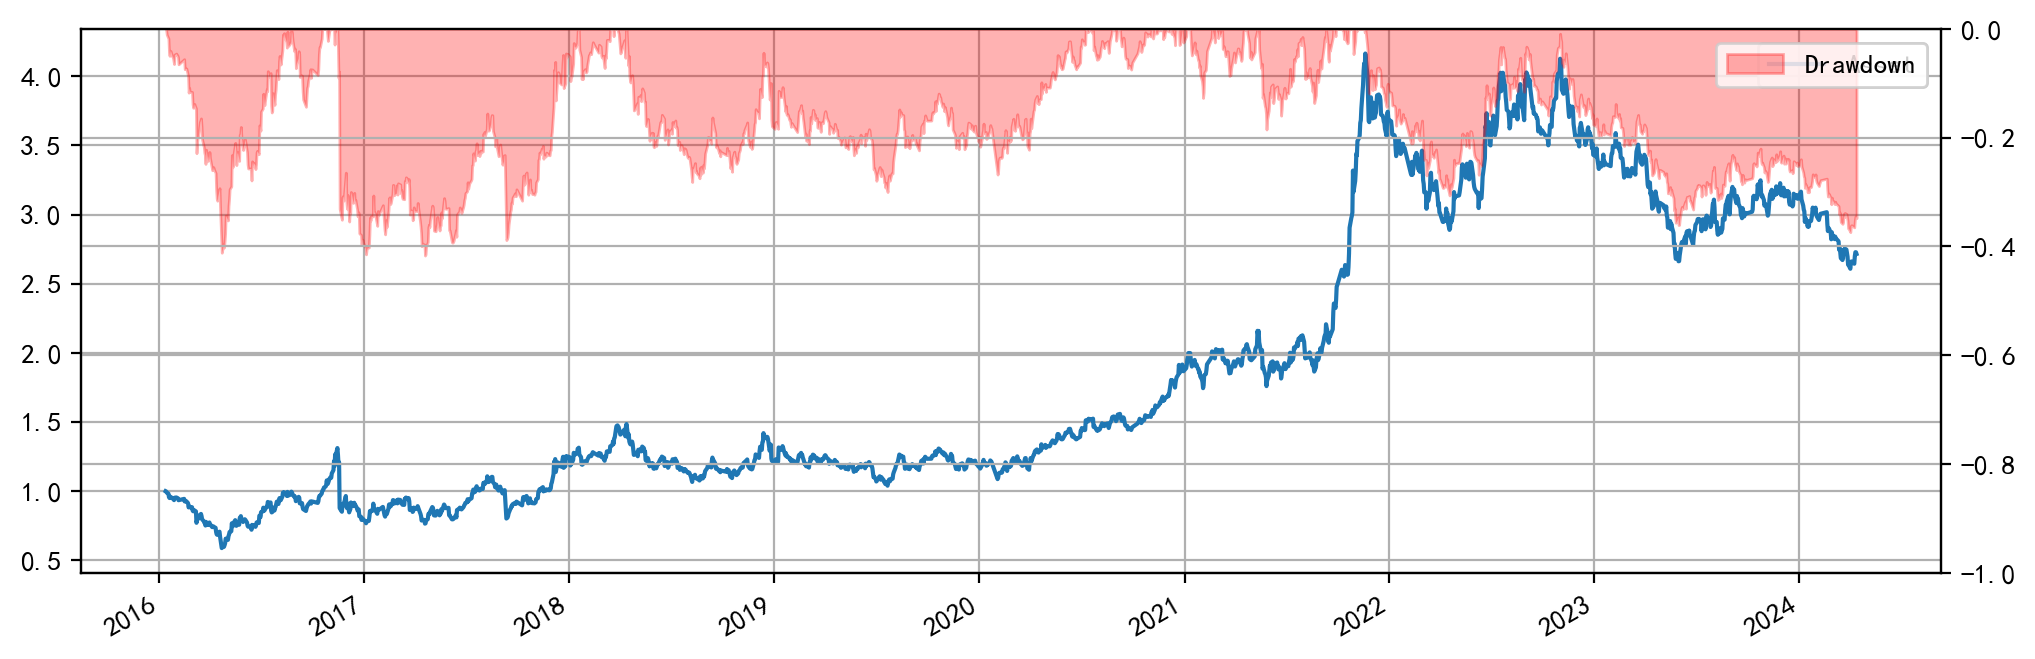

In [417]:
posi_4 = I_S005566895 / I_S005566895.abs()
posi_4 = posi_4.replace(np.nan, 0)
price, posi_4 = opens['black'].dropna().align(posi_4, join='inner')
price.name = posi_4.name = "black"
nwm = strat_test.NetWorthMaker(price, posi_4)
nwm.plot()

## I_S006699504
制热:空气源热泵:销量:当月同比

Text(0.5, 1.0, 'I_S006699504')

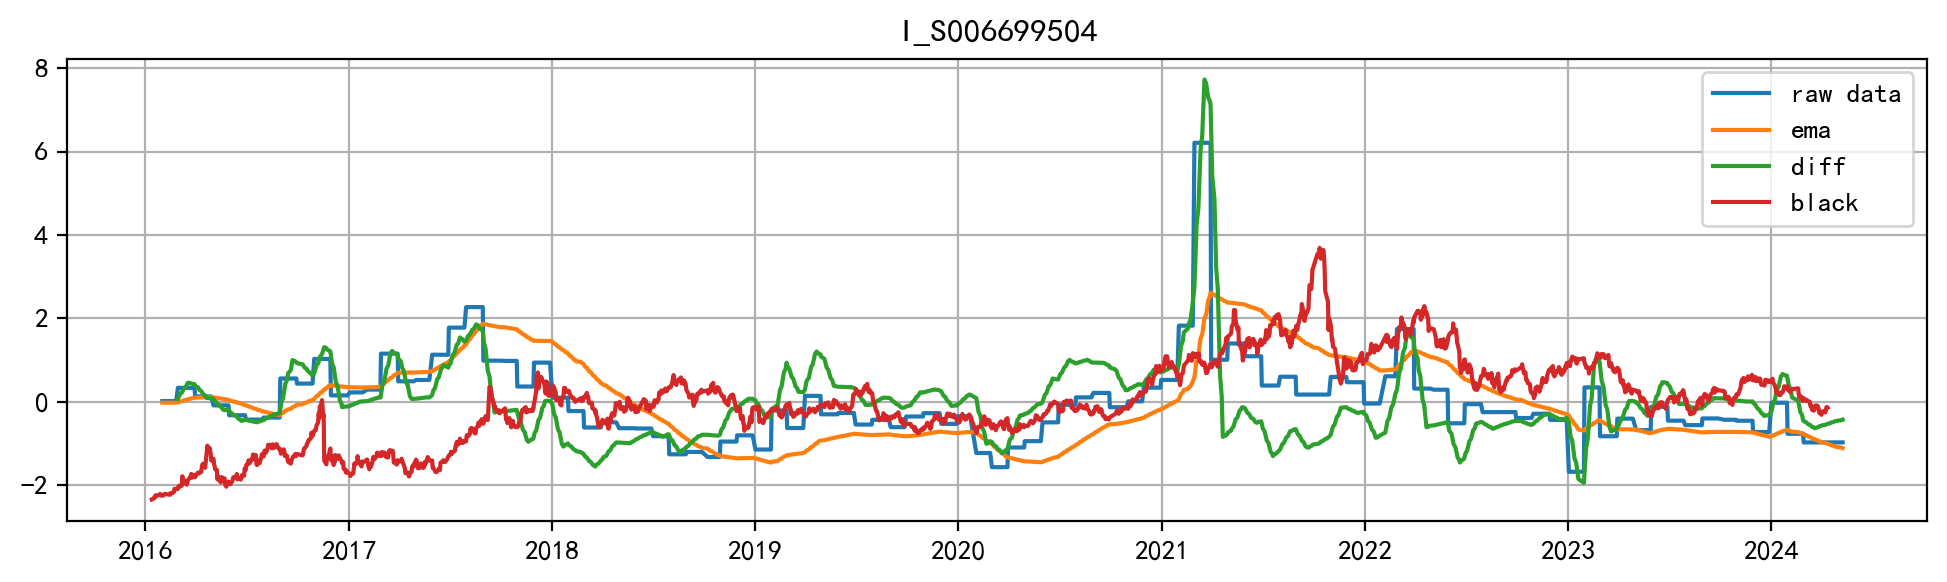

In [12]:
name = "I_S006699504"
I_S006699504 = pd.read_csv(f'{factor_dir}/mech_equip.csv',index_col=0, parse_dates=True)[name]
I_S006699504 = I_S006699504.loc[:end_date]
plt.plot(utils.scale(I_S006699504), label='raw data')
I_S006699504 = utils.ema(I_S006699504, 1/85)
plt.plot(utils.scale(I_S006699504), label='ema')
I_S006699504 = I_S006699504.diff(15)
plt.plot(utils.scale(I_S006699504), label='diff')
# I_S006699504 = utils.ts_rank(I_S006699504, 30, "dynamic") - 0.5
# plt.plot(utils.scale(I_S006699504, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

In [13]:
def test_params(name, end_date, ema_alpha=1/20, ts_rank_w=75, diff_w=30):
    factor = pd.read_csv(f'{factor_dir}/mech_equip.csv',index_col=0, parse_dates=True)[name]
    factor = factor.loc[:pd.to_datetime(end_date)]
    factor = utils.ema(factor, ema_alpha)
    factor = factor.diff(diff_w)
    # factor = utils.ts_rank(factor, ts_rank_w, "dynamic") - 0.5
    posi = factor / factor.abs()
    posi = posi.replace(np.nan, 0)
    price, posi = opens['black'].dropna().align(posi, join='inner')
    price.name = posi.name = 'black'
    nwm = strat_test.NetWorth(price, posi)
    return nwm, posi

In [235]:
alphas = range(5, 101, 5)
ws = range(5, 100, 5)
rets = pd.DataFrame(index=alphas, columns=ws)

for alpha in tqdm(alphas):
    for w in ws:
        nwm, _ = test_params(name, end_date, ema_alpha=1/alpha, diff_w=w)
        rets.loc[alpha, w] = nwm.get_total().loc['calmar']

  0%|          | 0/20 [00:00<?, ?it/s]

In [236]:
rets.apply(pd.to_numeric).style.background_gradient(axis=None).format("{:.2f}")

<Axes: >

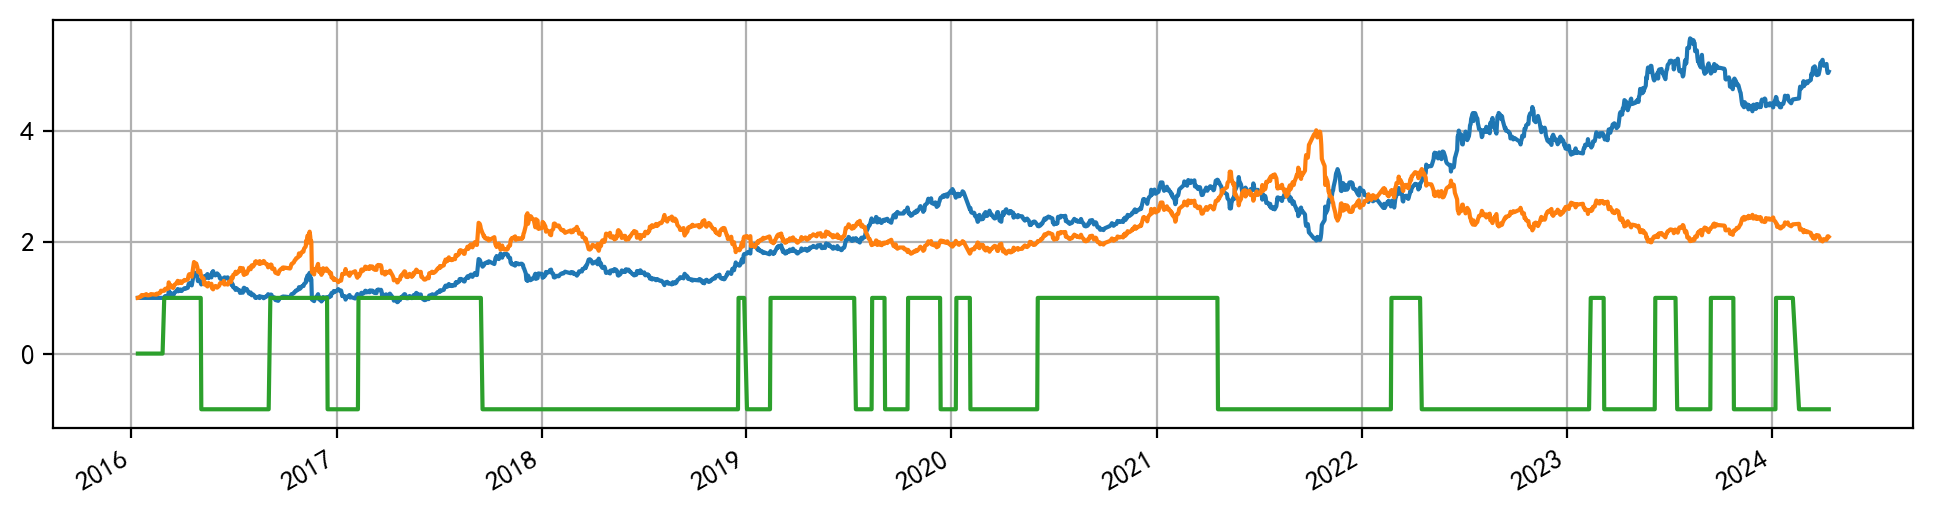

In [14]:
nwm, posi_5 = test_params(name, end_date, ema_alpha=1/85, diff_w=15)
plt.plot(nwm.get_networth(), label='networth')
nwm.get_annual()
plt.plot(utils.scale(opens['black'], "1stvalue"))
posi_5.plot()

## I_S005951771
销量:工程机械行业:合计:累计同比

Text(0.5, 1.0, 'I_S005951771')

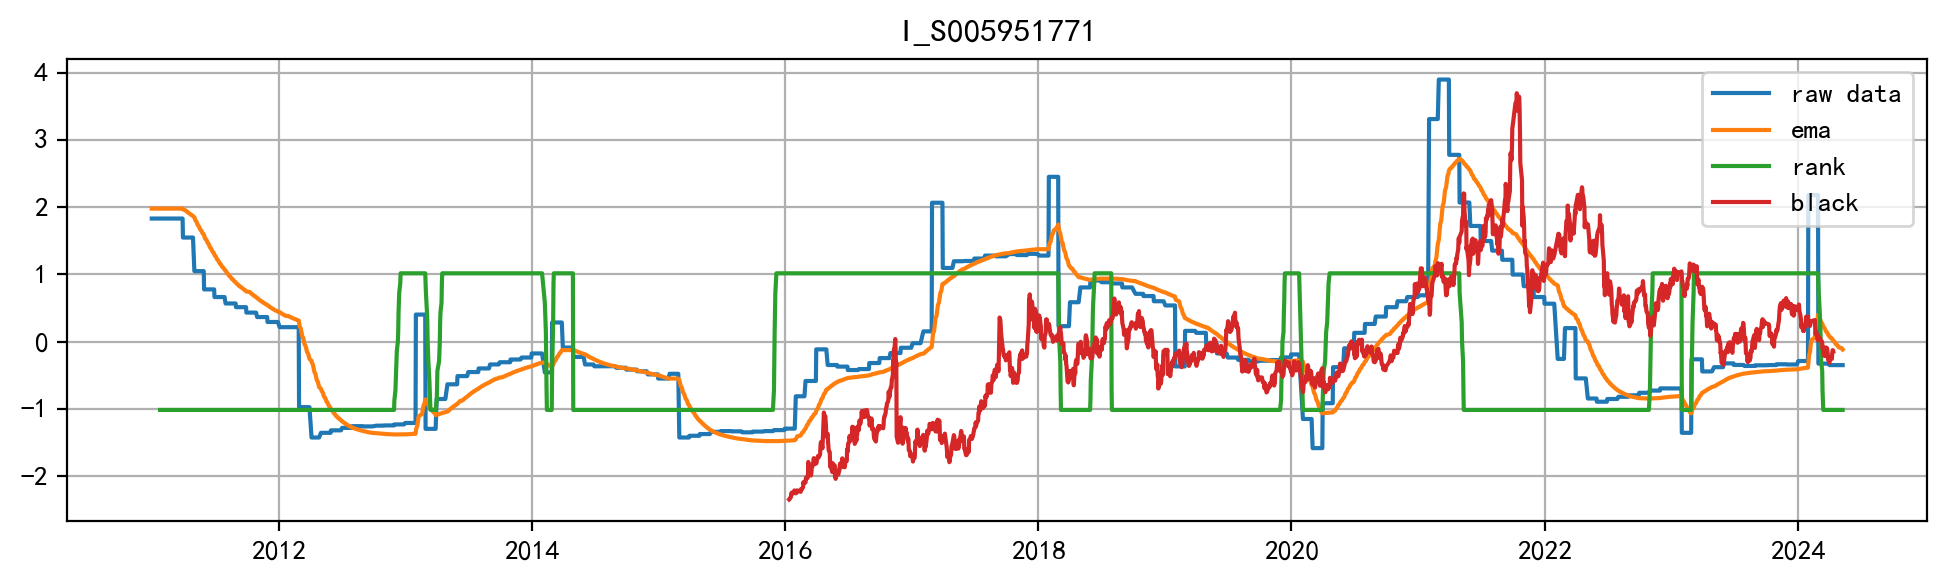

In [15]:
name = "I_S005951771"
I_S005951771 = pd.read_csv(f'{factor_dir}/mech_equip.csv',index_col=0, parse_dates=True)[name]
I_S005951771 = I_S005951771.loc[:end_date]
plt.plot(utils.scale(I_S005951771), label='raw data')
I_S005951771 = utils.ema(I_S005951771, 1/45)
plt.plot(utils.scale(I_S005951771), label='ema')
# I_S005951771 = I_S005951771.diff()
# plt.plot(utils.scale(I_S005951771), label='diff')
I_S005951771 = utils.ts_rank(I_S005951771, 15, "dynamic") - 0.5
plt.plot(utils.scale(I_S005951771, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

In [16]:
def test_params(name, end_date, ema_alpha=1/20, ts_rank_w=75):
    factor = pd.read_csv(f'{factor_dir}/mech_equip.csv',index_col=0, parse_dates=True)[name]
    factor = factor.loc[:pd.to_datetime(end_date)]
    factor = utils.ema(factor, ema_alpha)
    # factor = factor.diff()
    factor = utils.ts_rank(factor, ts_rank_w, "numpy") - 0.5
    posi = factor / factor.abs()
    posi = posi.replace(np.nan, 0)
    price, posi = opens['black'].dropna().align(posi, join='inner')
    price.name = posi.name = 'black'
    nwm = strat_test.NetWorth(price, posi)
    return nwm, posi

In [263]:
alphas = range(5, 101, 5)
ws = range(5, 100, 5)
rets = pd.DataFrame(columns=ws, index=alphas)

for alpha in tqdm(alphas):
    for w in ws:
        nwm, _ = test_params(name, end_date, ema_alpha=1/alpha, ts_rank_w=w)
        rets.loc[alpha, w] = nwm.get_total().loc['calmar']

  0%|          | 0/20 [00:00<?, ?it/s]

In [264]:
rets.apply(pd.to_numeric).style.background_gradient(axis=None).format("{:.2f}")

days  acc.%  ret.%  std.%  mdd.%  calmar  sharpe  tr.%  long.%  \
2016    237  55.70  32.77  47.49  39.62    0.83    0.69  0.00  100.00   
2017    244  50.00  71.92  41.23  20.60    3.49    1.74  0.00  100.00   
2018    243  51.85  27.68  29.89  17.88    1.55    0.93  1.23   31.28   
2019    244  50.82   5.68  23.32  21.59    0.26    0.24  0.41    6.97   
2020    243  55.14  22.35  24.52  20.47    1.09    0.91  0.82   80.25   
2021    243  50.21  27.48  33.12  35.96    0.76    0.83  0.41   32.92   
2022    242  50.83  29.82  28.67  21.38    1.39    1.04  0.41   17.36   
2023    242  51.24 -15.74  21.85  33.32   -0.47   -0.72  0.83   90.50   
2024     66  51.52  -6.22   9.35  10.88   -0.57   -0.67  1.52   62.12   
total  2004  52.20  25.52  32.57  41.68    0.61    0.78  0.55   57.44   

       short.%   abs.%  
2016      0.00  100.00  
2017      0.00  100.00  
2018     68.31   99.59  
2019     92.62   99.59  
2020     19.34   99.59  
2021     66.67   99.59  
2022     82.64  100.00  
2023      9.09   99.59  
2024     37.88  100.00  
total    42.32   99.75

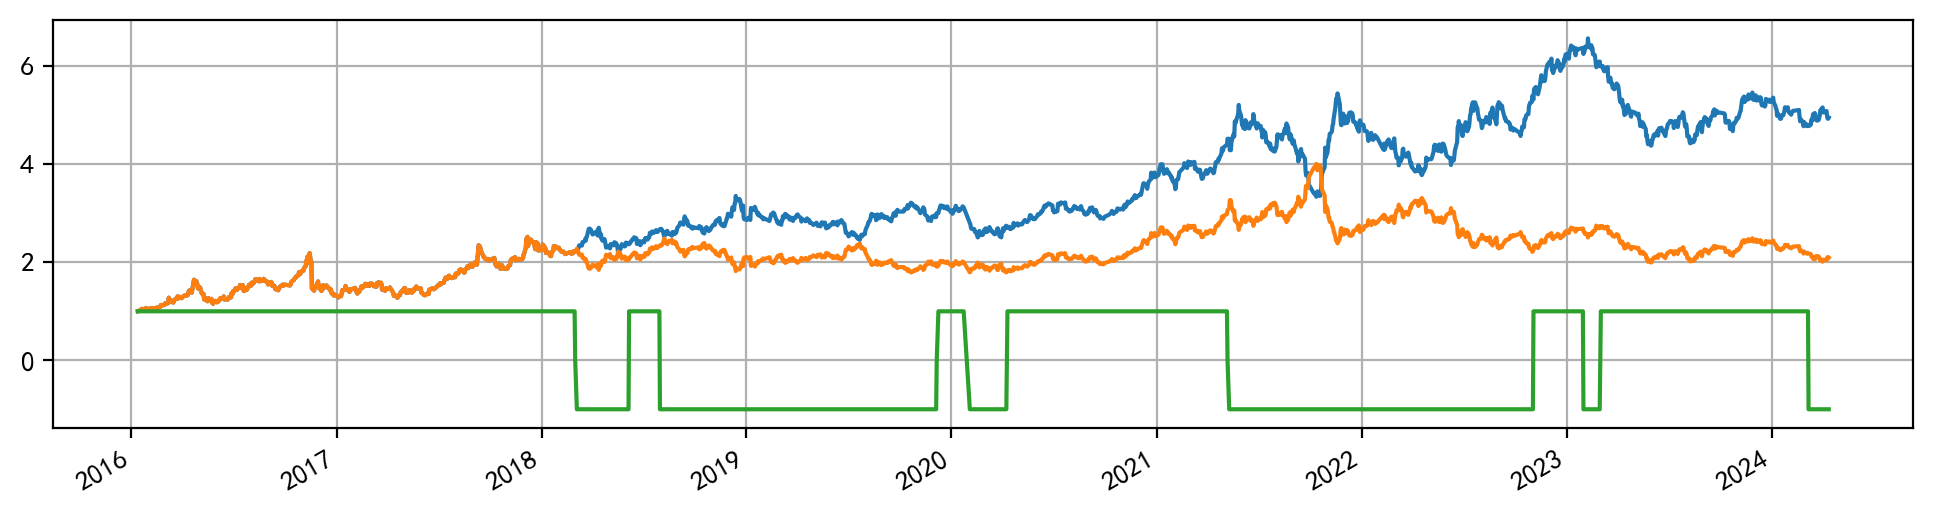

In [17]:
nwm, posi_6 = test_params(name, end_date, ema_alpha=1/45, ts_rank_w=15)
plt.plot(nwm.get_networth(), label='networth')
plt.plot(utils.scale(opens['black'], "1stvalue"))
posi_6.plot()
nwm.get_annual()

# I_M001622744
铁路机车:产量:当月同比

Text(0.5, 1.0, 'I_M001622744')

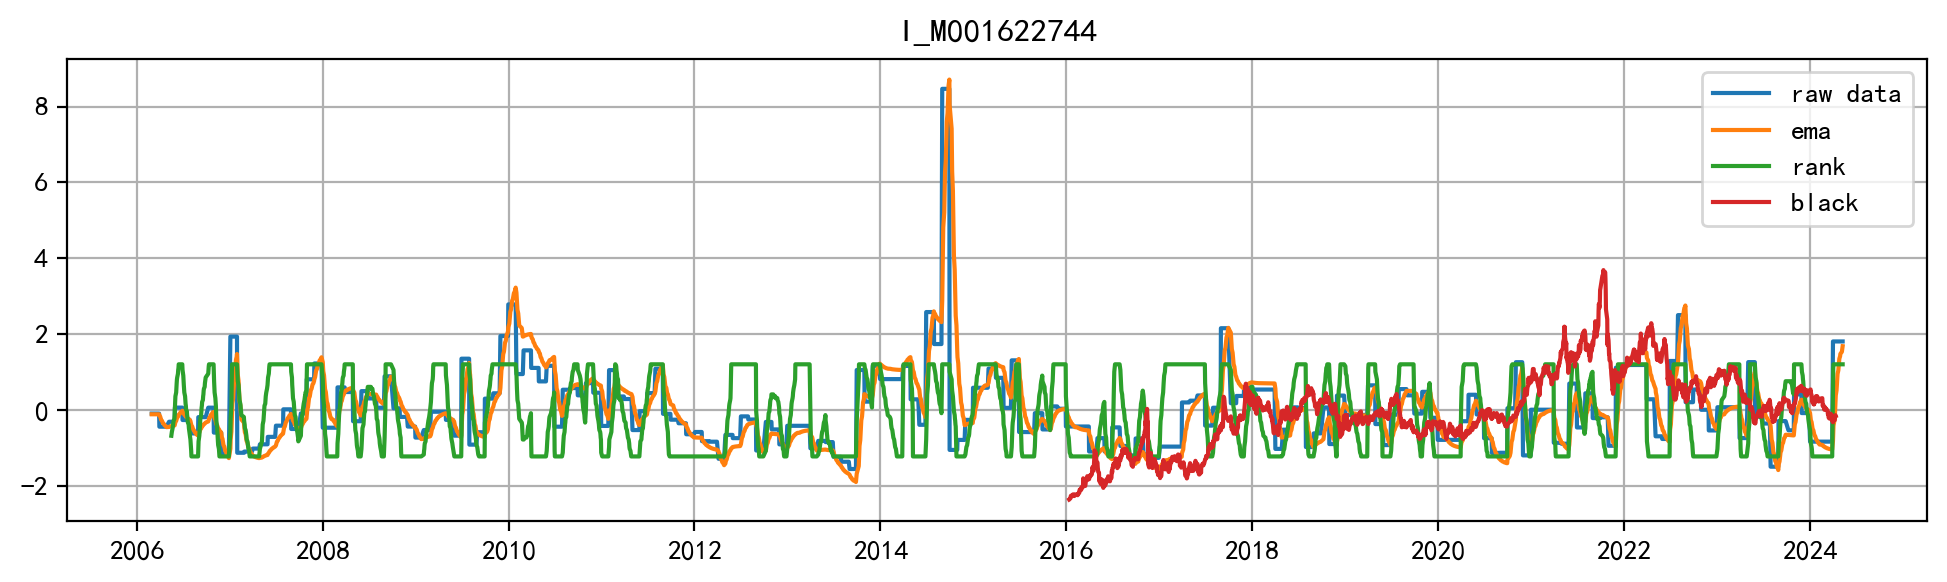

In [424]:
name = "I_M001622744"
I_M001622744 = pd.read_csv(f'{factor_dir}/arch_dec.csv',index_col=0, parse_dates=True)[name]
I_M001622744 = I_M001622744.loc[:end_date]
plt.plot(utils.scale(I_M001622744), label='raw data')
I_M001622744 = utils.ema(I_M001622744, 1/15)
plt.plot(utils.scale(I_M001622744), label='ema')
I_M001622744 = utils.ts_rank(I_M001622744, 50, "dynamic") - 0.5
plt.plot(utils.scale(I_M001622744, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

In [425]:
def test_params(name, end_date, ema_alpha=1/20, ts_rank_w=75):
    factor = pd.read_csv(f'{factor_dir}/arch_dec.csv',index_col=0, parse_dates=True)[name]
    factor = factor.loc[:pd.to_datetime(end_date)]
    factor = utils.ema(factor, ema_alpha)
    # factor = factor.diff()
    factor = utils.ts_rank(factor, ts_rank_w, "dynamic") - 0.5
    posi = factor / factor.abs()
    posi = posi.replace(np.nan, 0)
    price, posi = opens['black'].dropna().align(posi, join='inner')
    price.name = posi.name = 'black'
    nwm = strat_test.NetWorthMaker(price, posi)
    return nwm, posi

In [341]:
alphas = range(5, 101, 5)
ws = range(5, 101, 5)
rets = pd.DataFrame(columns=ws, index=alphas)

for alpha in tqdm(alphas):
    for w in ws:
        nwm, _ = test_params(name, end_date, ema_alpha=1/alpha, ts_rank_w=w)
        rets.loc[alpha, w] = nwm.get_total().loc['calmar']

  0%|          | 0/20 [00:00<?, ?it/s]

In [342]:
rets.apply(pd.to_numeric).style.background_gradient(axis=None).format("{:.2f}")

days  acc.%   ret.%  std.%  mdd.%  calmar  sharpe  tr.%  long.%  \
2016    237  47.68  -12.06  47.56  42.92   -0.28   -0.25  1.27    8.86   
2017    244  52.87   22.80  41.39  28.45    0.80    0.55  1.64   78.69   
2018    243  48.56   23.23  30.00  17.88    1.30    0.77  2.06   18.52   
2019    244  52.05   -3.58  23.35  17.27   -0.21   -0.15  2.05   69.26   
2020    243  53.50   44.99  24.44  10.30    4.37    1.84  1.23   42.39   
2021    243  55.97  106.46  32.82  22.27    4.78    3.24  2.47   60.49   
2022    242  55.37   71.65  28.49  16.84    4.25    2.51  1.24   51.24   
2023    242  52.89   18.45  21.84  14.10    1.31    0.84  2.07   45.45   
2024     66  51.52    0.66   9.38  12.19    0.05    0.07  3.03   21.21   
total  2004  52.59   87.91  32.57  42.92    2.05    2.70  1.80   46.16   

       short.%  abs.%  
2016     91.14  100.0  
2017     21.31  100.0  
2018     81.48  100.0  
2019     30.74  100.0  
2020     57.61  100.0  
2021     39.51  100.0  
2022     48.76  100.0  
2023     54.55  100.0  
2024     78.79  100.0  
total    53.84  100.0

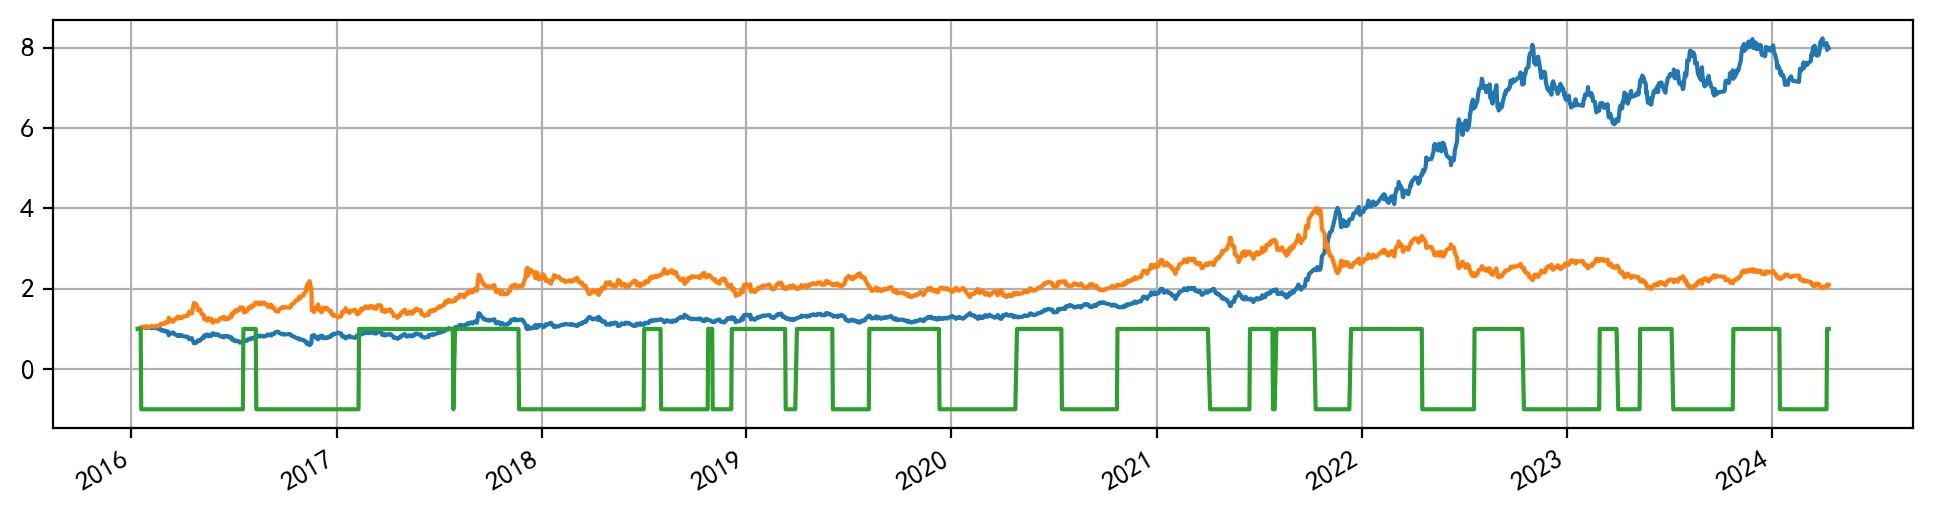

In [426]:
nwm, posi_7 = test_params(name, end_date, ema_alpha=1/30, ts_rank_w=90)
plt.plot(nwm.get_networth(), label='networth')
plt.plot(utils.scale(opens['black'], "1stvalue"))
posi_7.plot()
nwm.get_annual()

# I_M001622745
铁路机车:产量:累计同比

Text(0.5, 1.0, 'I_M001622745')

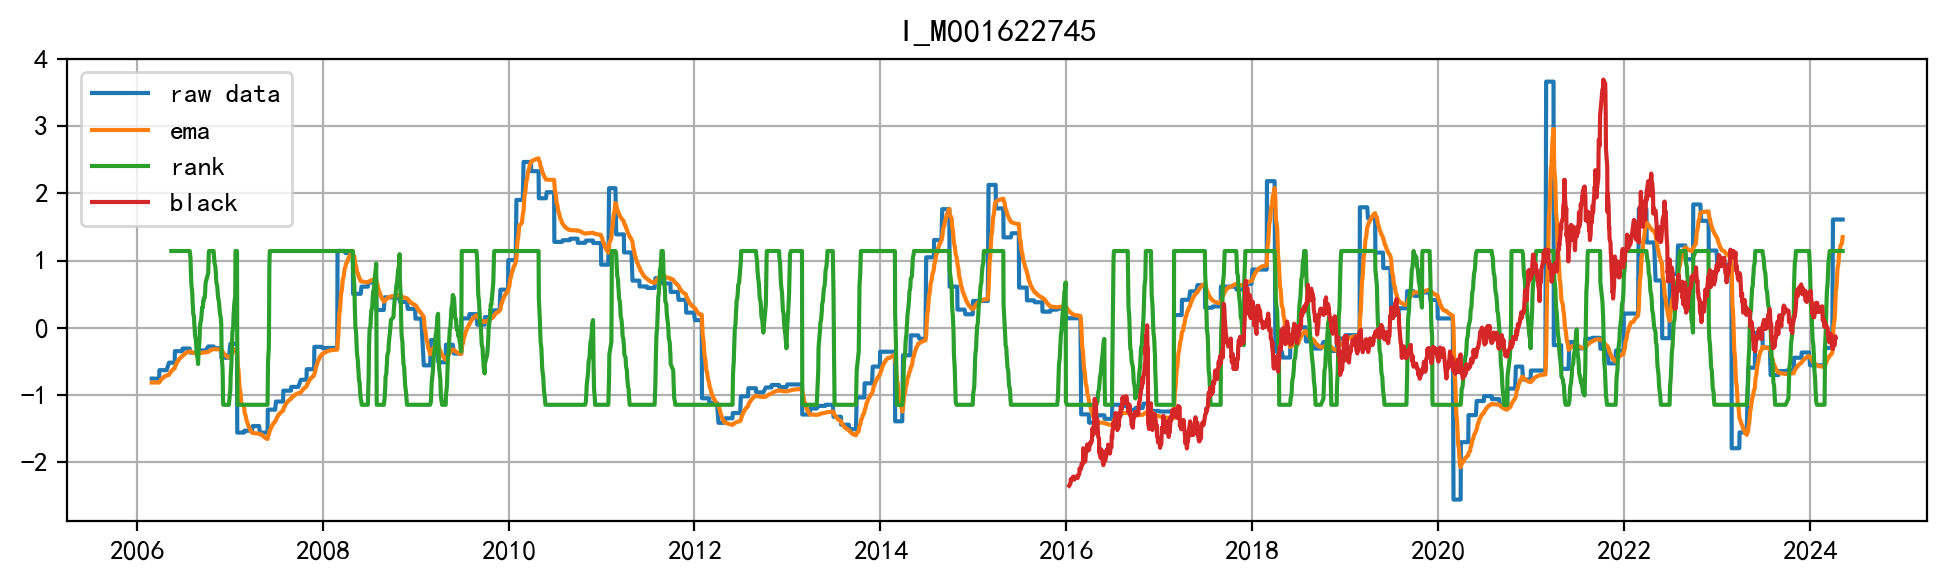

In [18]:
name = "I_M001622745"
I_M001622745 = pd.read_csv(f'{factor_dir}/arch_dec.csv',index_col=0, parse_dates=True)[name]
I_M001622745 = I_M001622745.loc[:end_date]
plt.plot(utils.scale(I_M001622745), label='raw data')
I_M001622745 = utils.ema(I_M001622745, 1/15)
plt.plot(utils.scale(I_M001622745), label='ema')
I_M001622745 = utils.ts_rank(I_M001622745, 50, "dynamic") - 0.5
plt.plot(utils.scale(I_M001622745, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

In [19]:
def test_params(name, end_date, ema_alpha=1/20, ts_rank_w=75):
    factor = pd.read_csv(f'{factor_dir}/arch_dec.csv',index_col=0, parse_dates=True)[name]
    factor = factor.loc[:pd.to_datetime(end_date)]
    factor = utils.ema(factor, ema_alpha)
    # factor = factor.diff()
    factor = utils.ts_rank(factor, ts_rank_w, "numpy") - 0.5
    posi = factor / factor.abs()
    posi = posi.replace(np.nan, 0)
    price, posi = opens['black'].dropna().align(posi, join='inner')
    price.name = posi.name = 'black'
    nwm = strat_test.NetWorth(price, posi)
    return nwm, posi

In [349]:
alphas = range(5, 101, 5)
ws = range(55, 151, 5)
rets = pd.DataFrame(columns=ws, index=alphas)

for alpha in tqdm(alphas):
    for w in ws:
        nwm, _ = test_params(name, end_date, ema_alpha=1/alpha, ts_rank_w=w)
        rets.loc[alpha, w] = nwm.get_total().loc['calmar']

  0%|          | 0/20 [00:00<?, ?it/s]

In [350]:
rets.apply(pd.to_numeric).style.background_gradient(axis=None).format("{:.2f}")

days  acc.%   ret.%  std.%  mdd.%  calmar  sharpe  tr.%  long.%  \
2016    237  51.05  -14.59  47.56  41.16   -0.35   -0.31  1.69   33.33   
2017    244  49.18    9.76  41.41  34.45    0.28    0.24  1.23   78.69   
2018    243  47.33  -13.71  30.03  35.52   -0.39   -0.46  0.82   33.74   
2019    244  53.69   33.68  23.26   9.31    3.62    1.45  1.23   55.33   
2020    243  48.97   21.50  24.53  19.37    1.11    0.88  1.23   47.74   
2021    243  56.38  118.97  32.76  18.51    6.43    3.63  1.23   72.02   
2022    242  53.72   41.50  28.63  15.49    2.68    1.45  0.83   93.80   
2023    242  51.24   27.41  21.81  17.65    1.55    1.26  1.65   29.75   
2024     66  40.91   -6.95   9.34  11.94   -0.58   -0.74  3.03   56.06   
total  2004  51.40   25.52  32.59  47.24    0.54    0.78  1.35   55.64   

       short.%  abs.%  
2016     66.67  100.0  
2017     21.31  100.0  
2018     66.26  100.0  
2019     44.67  100.0  
2020     52.26  100.0  
2021     27.98  100.0  
2022      6.20  100.0  
2023     70.25  100.0  
2024     43.94  100.0  
total    44.36  100.0

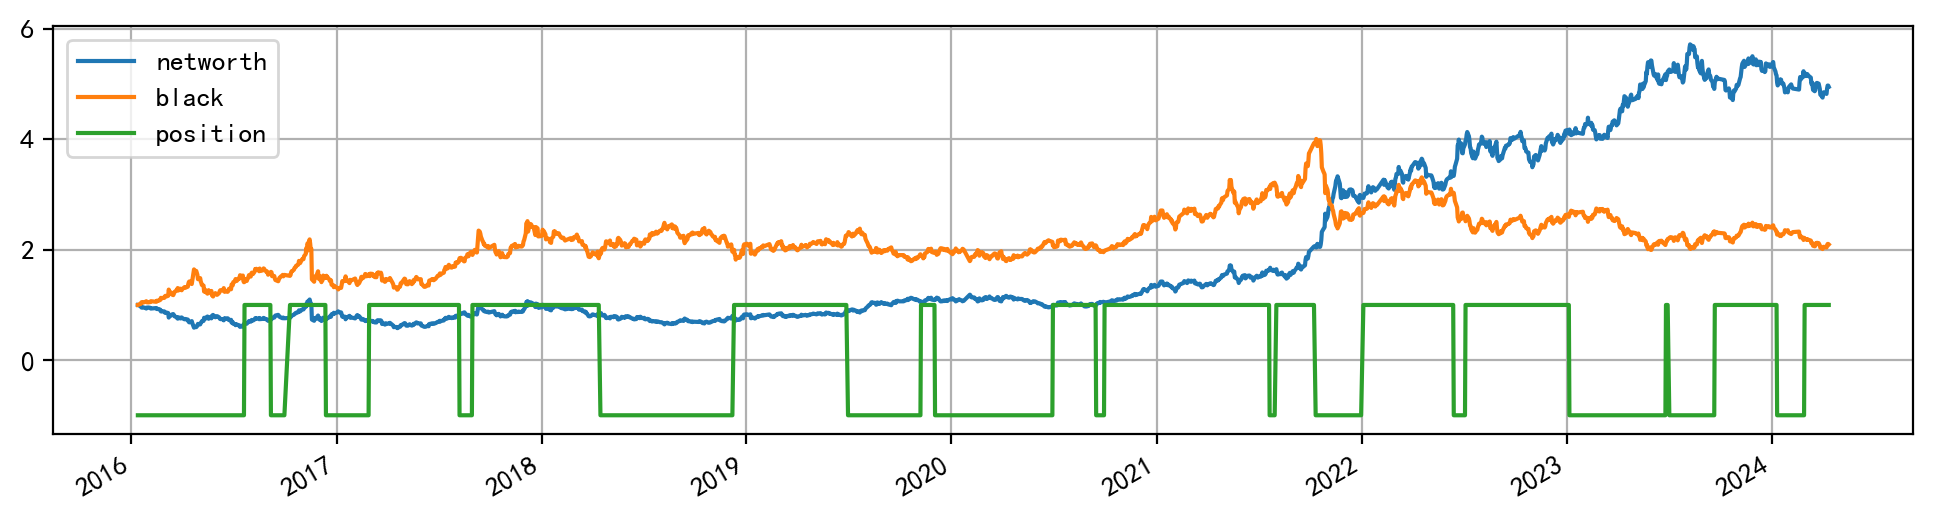

In [20]:
nwm, posi_7 = test_params(name, end_date, ema_alpha=1/10, ts_rank_w=150)
plt.plot(nwm.get_networth(), label='networth')
plt.plot(utils.scale(opens['black'], "1stvalue"), label='black')
posi_7.plot(label='position')
plt.legend()
nwm.get_annual()

# I_M003811093
固定资产投资(不含农户)完成额:水利、环境和公共设施管理业:累计同比

Text(0.5, 1.0, 'I_M003811093')

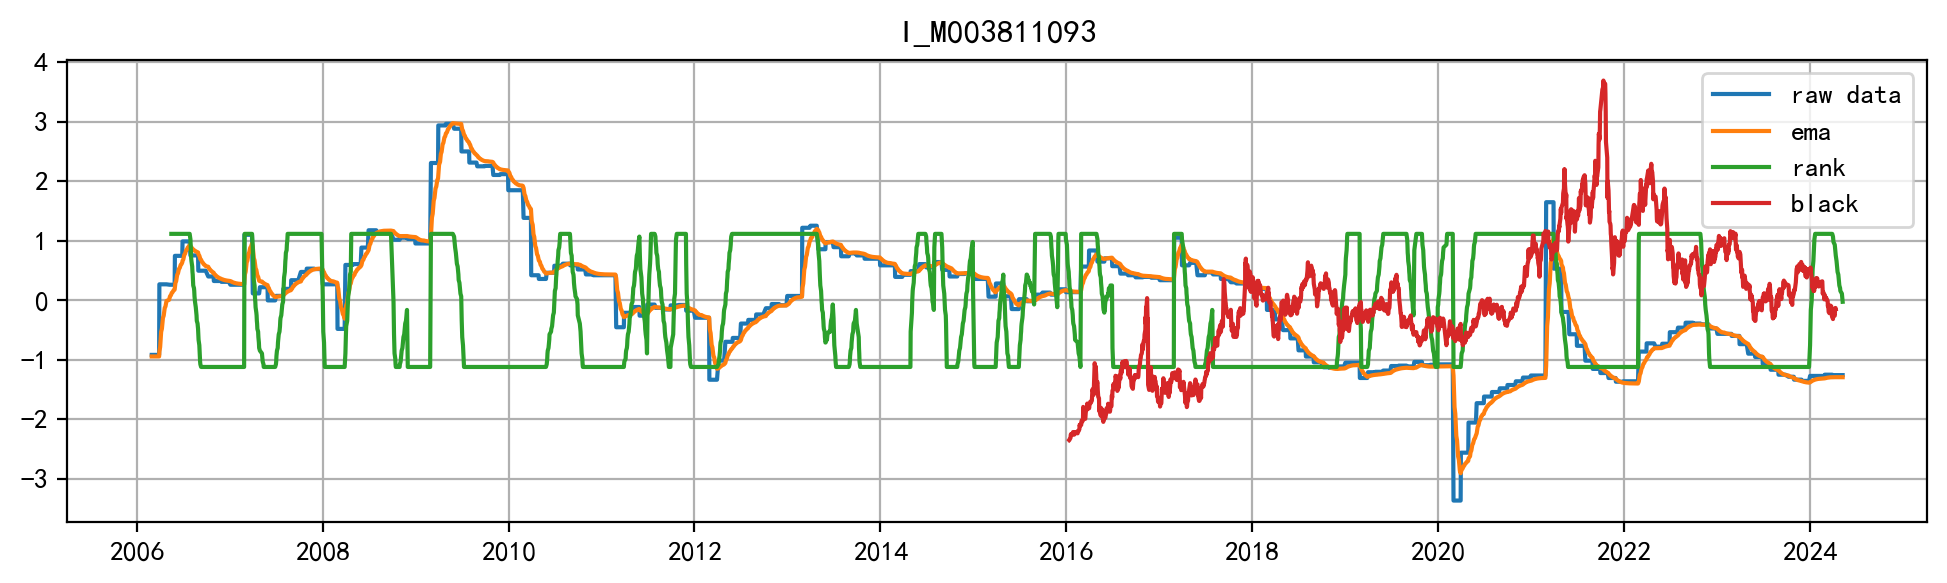

In [384]:
name = "I_M003811093"
I_M003811093 = pd.read_csv(f'{factor_dir}/arch_dec.csv',index_col=0, parse_dates=True)[name]
I_M003811093 = I_M003811093.loc[:end_date]
# I_M003811093 = utils.yoy(I_M003811093, freq='m')
plt.plot(utils.scale(I_M003811093), label='raw data')
I_M003811093 = utils.ema(I_M003811093, 1/15)
plt.plot(utils.scale(I_M003811093), label='ema')
I_M003811093 = utils.ts_rank(I_M003811093, 50, "dynamic") - 0.5
plt.plot(utils.scale(I_M003811093, how='divstd'), label='rank')
plt.plot(utils.scale(opens['black'], how='standard'), label='black')
plt.legend()
plt.title(name)

In [380]:
def test_params(name, end_date, ema_alpha=1/20, ts_rank_w=75):
    factor = pd.read_csv(f'{factor_dir}/arch_dec.csv',index_col=0, parse_dates=True)[name]
    factor = factor.loc[:pd.to_datetime(end_date)]
    factor = utils.yoy(factor, freq='m')
    factor = utils.ema(factor, ema_alpha)
    # factor = factor.diff()
    factor = utils.ts_rank(factor, ts_rank_w, "dynamic") - 0.5
    posi = factor / factor.abs()
    posi = posi.replace(np.nan, 0)
    price, posi = opens['black'].dropna().align(posi, join='inner')
    price.name = posi.name = 'black'
    nwm = strat_test.NetWorthMaker(price, posi)
    return nwm, posi

In [381]:
alphas = range(5, 101, 5)
ws = range(5, 100, 5)
rets = pd.DataFrame(columns=ws, index=alphas)

for alpha in tqdm(alphas):
    for w in ws:
        nwm, _ = test_params(name, end_date, ema_alpha=1/alpha, ts_rank_w=w)
        rets.loc[alpha, w] = nwm.get_total().loc['calmar']

  0%|          | 0/20 [00:00<?, ?it/s]

In [382]:
rets.apply(pd.to_numeric).style.background_gradient(axis=None).format("{:.2f}")

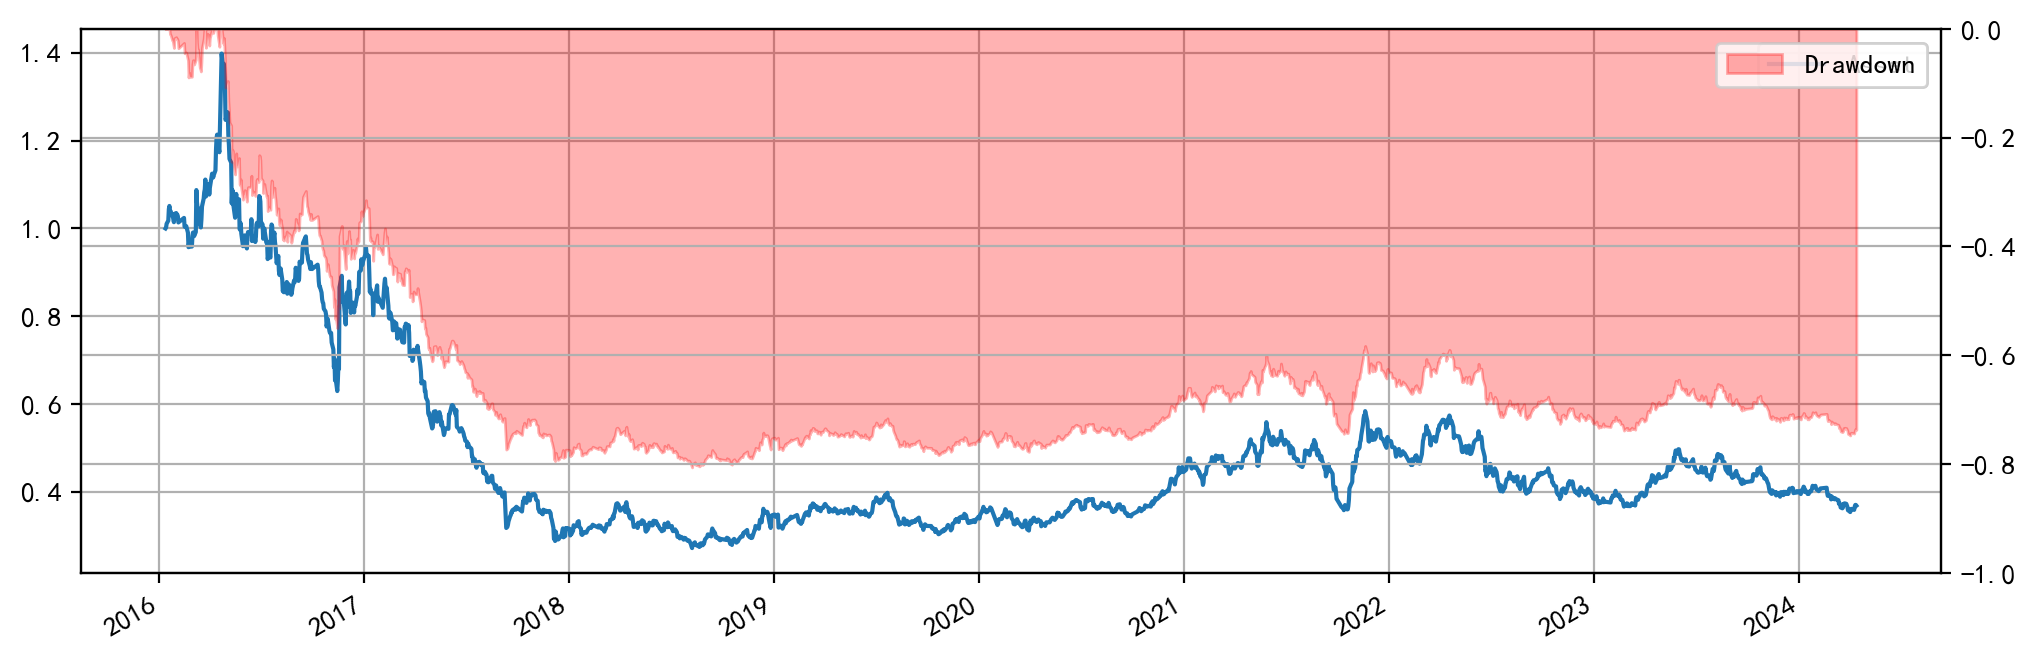

In [385]:
posi = I_M003811093 / I_M003811093.abs()
posi = posi.replace(np.nan, 0)
price, posi = opens['black'].dropna().align(posi, join='inner')
price.name = posi.name = "black"
nwm = strat_test.NetWorthMaker(price, posi)
nwm.plot()

## 需求合成并检验可用性
I_M005383066、I_S009065219、I_S004543083、I_S005566895、I_S006699504、I_S005951771、I_M001622745

~~发动机:产量:累计同比~~

商用车:出口数量:当月同比

全国城市二手房出售挂牌价指数:当周值

~~集装箱:出口金额:当月同比~~

制热:空气源热泵:销量:当月同比

销量:工程机械行业:合计:累计同比

铁路机车:产量:累计同比

<Axes: >

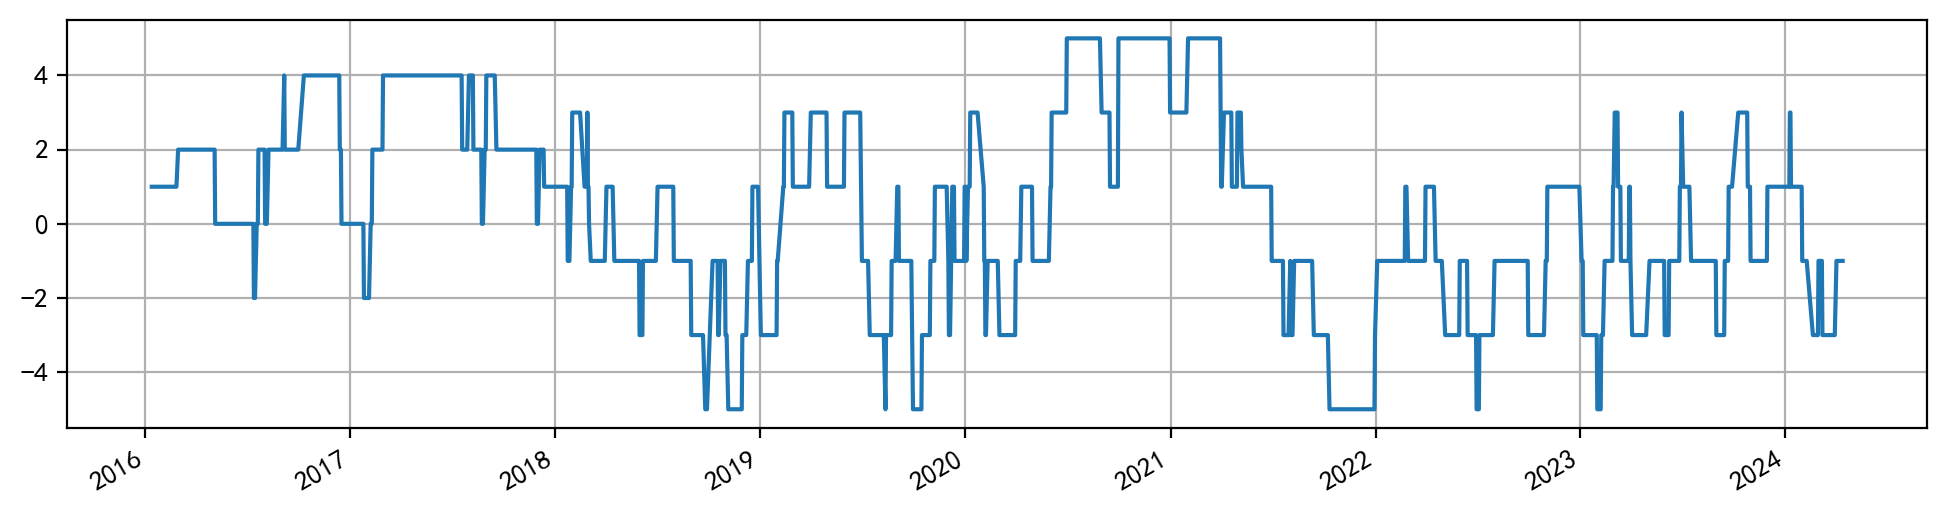

In [30]:
a = pd.concat([posi_2, posi_3, posi_5, posi_6, posi_7], axis=1)
a.sum(axis=1).plot()

In [22]:
# posi_1a = posi_1.reindex(posi_6.index, fill_value=0)
posi_2a = posi_2.reindex(posi_6.index, fill_value=0)
posi_3a = posi_3.reindex(posi_6.index, fill_value=0) 
# posi_4a = posi_4.reindex(posi_6.index, fill_value=0)
posi_5a = posi_5.reindex(posi_6.index, fill_value=0)
posi_6a = posi_6.reindex(posi_6.index, fill_value=0)
posi_7a = posi_7.reindex(posi_6.index, fill_value=0)

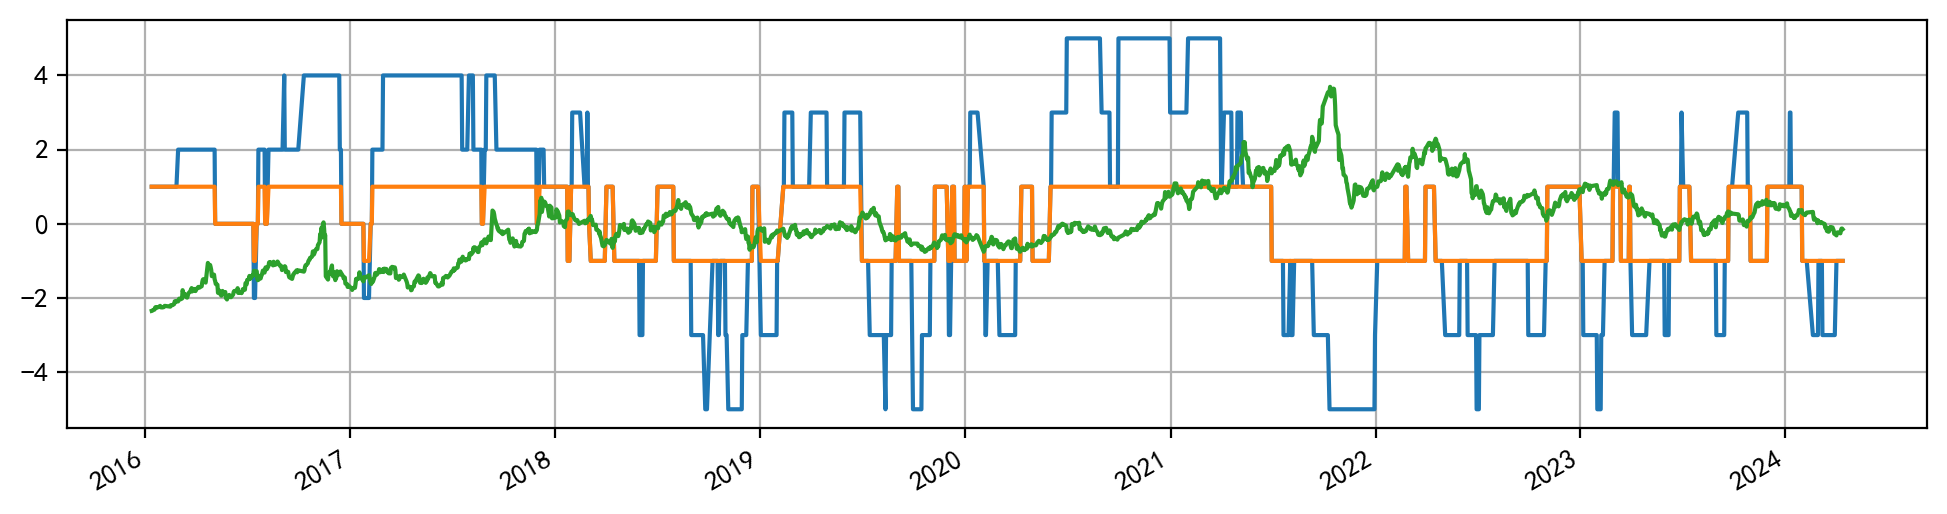

In [23]:
posi = posi_5a + posi_6a + posi_2a + posi_3a + posi_7a
posi.plot()
plt.plot((posi / posi.abs()).replace(np.nan, 0))
plt.plot(utils.scale(opens['black'], how='standard'))

In [4]:
posi = pd.read_csv("data/position/black_demand_prim.csv", index_col=0, parse_dates=True)

In [5]:
posi = posi / posi.abs()
posi = posi.replace(np.nan, 0)
price = opens['black'].dropna()
price, posi = price.align(posi, join='inner')
price.name = posi.name = 'black'
nwm = strat_test.NetWorth(price, posi)
nwm.get_annual()

days  acc.%  ret.%  std.%  mdd.%  calmar  sharpe  tr.%  long.%  \
2016    237  43.88  45.56  42.31  35.43    1.29    1.08  1.48   71.31   
2017    244  44.26  47.27  38.87  20.60    2.29    1.22  1.43   88.52   
2018    243  50.62  63.57  29.74  15.18    4.19    2.14  3.29   29.63   
2019    244  53.28  44.87  23.21  14.54    3.09    1.93  3.69   48.77   
2020    243  53.09   6.83  24.56  19.90    0.34    0.28  2.47   72.43   
2021    243  51.44  10.71  33.19  39.83    0.27    0.32  0.41   48.15   
2022    242  52.07  34.17  28.66  22.74    1.50    1.19  2.07   22.73   
2023    242  48.35  11.36  21.86  21.28    0.53    0.52  3.72   28.51   
2024     66  57.58   6.04   9.34   7.98    0.76    0.65  1.52   31.82   
total  2004  50.20  33.31  31.25  39.83    0.84    1.07  2.40   50.60   

       short.%   abs.%  
2016      1.27   72.57  
2017      1.23   89.75  
2018     69.96   99.59  
2019     51.23  100.00  
2020     27.16   99.59  
2021     51.85  100.00  
2022     77.27  100.00  
2023     71.49  100.00  
2024     68.18  100.00  
total    44.81   95.41

In [32]:
nwm.get_networth().to_csv("result/black.csv")

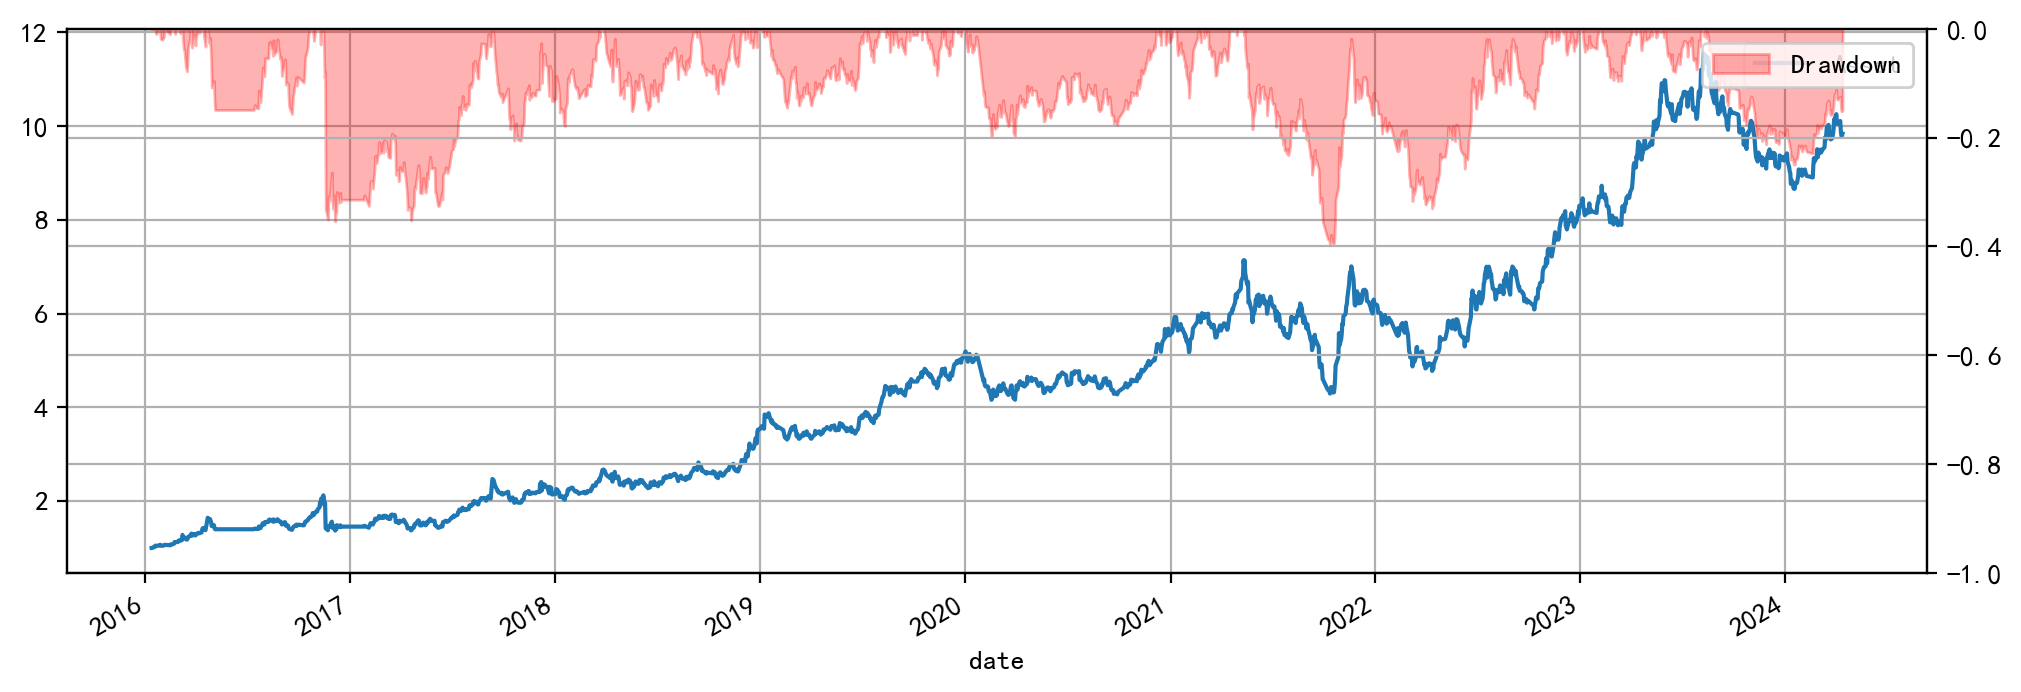

In [512]:
nwm.plot()

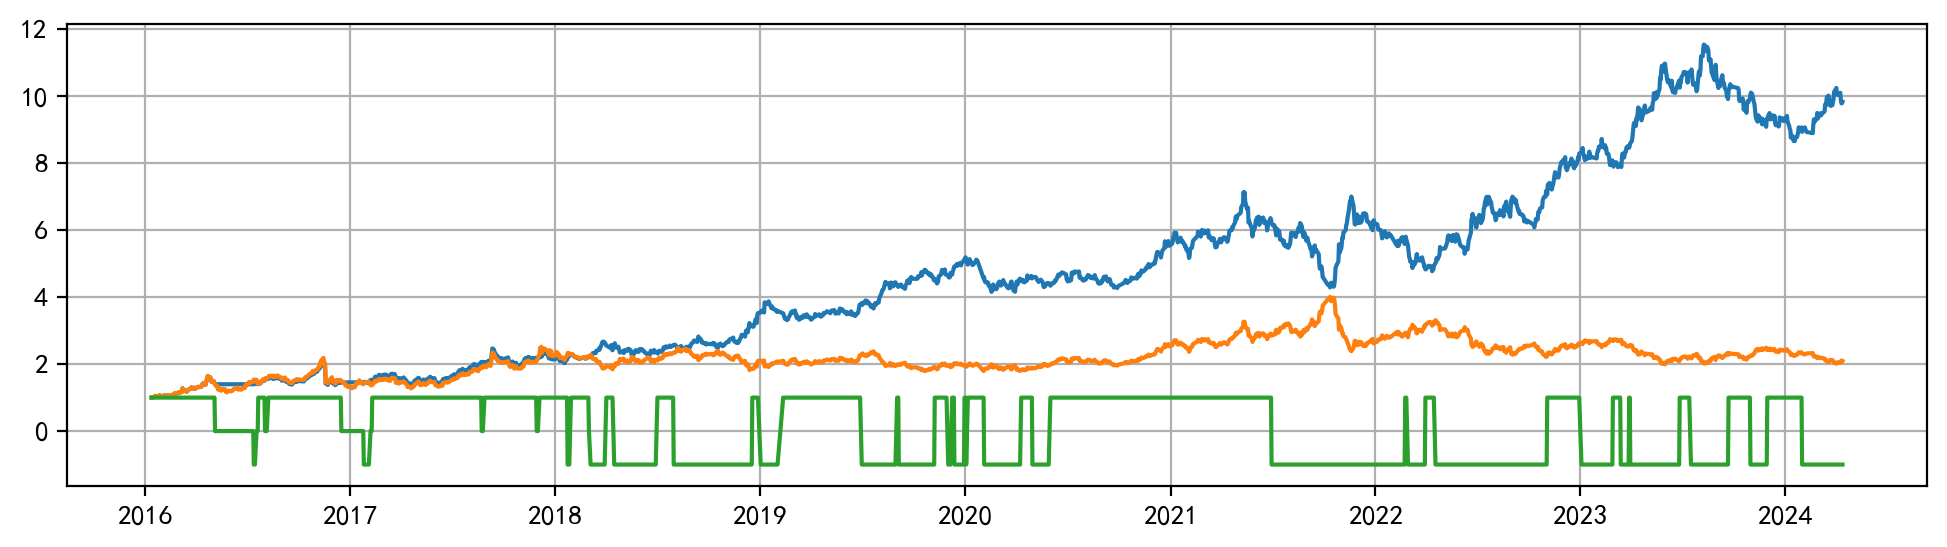

In [513]:
plt.plot(nwm.get_networth(), label='networth')
plt.plot(utils.scale(opens['black'], "1stvalue"))
real_posi = posi / posi.abs()
real_posi = real_posi.replace(np.nan, 0)
plt.plot(real_posi)

In [515]:
posi.to_csv('data/position/black_demand_prim.csv')

In [81]:
!python backtest.py "black_d" "C:\Users\ifwha\OneDrive - CUHK-Shenzhen\桌面\工作\A06_策略研究\黑色板块策略\data\position\black_demand.csv"

保存多头持仓文件: C:/Users/ifwha/OneDrive - CUHK-Shenzhen/桌面/工作/A06_策略研究/黑色板块策略/result\black_d\black_d_多头.csv
保存空头持仓文件: C:/Users/ifwha/OneDrive - CUHK-Shenzhen/桌面/工作/A06_策略研究/黑色板块策略/result\black_d\black_d_空头.csv
保存全部持仓文件: C:/Users/ifwha/OneDrive - CUHK-Shenzhen/桌面/工作/A06_策略研究/黑色板块策略/result\black_d\black_d.csv
读取持仓文件生成净值: C:/Users/ifwha/OneDrive - CUHK-Shenzhen/桌面/工作/A06_策略研究/黑色板块策略/result\black_d\black_d.csv


Traceback (most recent call last):
  File "backtest.py", line 73, in <module>
    MakeNetWorth(
  File "C:\Users/ifwha/OneDrive - CUHK-Shenzhen/桌面/工作/A03_回测框架/截面项目/dataprepare/code\makeNetWorthFuture.py", line 174, in run
    dfRst = self.show()
  File "C:\Users/ifwha/OneDrive - CUHK-Shenzhen/桌面/工作/A03_回测框架/截面项目/dataprepare/code\makeNetWorthFuture.py", line 193, in show
    dfRst = MyPlot(self.sResultDir, dfNet, naChangeRatio, self.bTrading, bSaveRst=bSaveRst).run()
  File "MyPlot.py", line 26, in MyPlot.MyPlot.__init__
  File "MyPlot.py", line 88, in MyPlot.MyPlot.get_yearly
  File "MyPlot.py", line 74, in MyPlot.MyPlot.get_ret_y
IndexError: index -1 is out of bounds for axis 0 with size 0
